# - Importation des bibliothèques et des fichiers

> ##  <a name="Fichier01"></a> Les bibliothèques utilisées

In [1]:
import numpy as numpy
import pandas as panda
import matplotlib.pyplot as plot
import seaborn as sns
import scipy.stats as scipystats

# Pour éviter d'avoir les messages warning
import warnings 
warnings.filterwarnings('ignore')

# Pour afficher le jupyter notebook à 90% de la taille d'écran
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

> ##  Les fichiers Importés

In [2]:
# Variable du répertoire d'installation
repertoireFichierImportation = "F:/36. Projet 06/01. Les données/"
# variable pour le nom du fichier à impoter
nomFichier1 = "customers.csv"
nomFichier2 = "products.csv"
nomFichier3 = "transactions.csv"
# Importer les données du fichiers dans le Dataframe aideAlimentaire
fichierCustomers = panda.read_csv(
    filepath_or_buffer=repertoireFichierImportation + nomFichier1, sep=',', header=0)
fichierProducts = panda.read_csv(
    filepath_or_buffer=repertoireFichierImportation + nomFichier2, sep=',', header=0)
fichierTransactions = panda.read_csv(
    filepath_or_buffer=repertoireFichierImportation + nomFichier3, sep=',', header=0)

# Les fonctions créés et utilisées pour ce projet

> ## Fonction qui détermine le début d'une chaine de caractère

In [3]:
# Fonction qui permet de récupérer les caractère de gauche d'une colonne (Liste, Nombre de caracère à gauche)
def detectionNbCaracteres(donnees, nbcar):
    listeCaracteres = []
    for i in donnees:
        mot = i[:nbcar]
        if mot not in listeCaracteres:
            listeCaracteres.append(mot)
    return listeCaracteres    

> ## Fonction qui détermine le nombre de caractères d'une colonne

In [4]:
# Fonction qui permet de récupérer le nombre de caractères dans une colonne
def nbCaracteres(donnees):
    nombrecaracteres = []
    for i in donnees:
        mot = len(i)
        if mot not in nombrecaracteres:
            nombrecaracteres.append(mot)
    return nombrecaracteres

> ## Fonction qui recherche les caractères

In [5]:
# Fonction qui donne la liste des caracères commençant par : (Liste, caractere)
def debutCaractere (donnees, caractere):
    listeCaractere = []
    nbcar = len(caractere)
    for i in donnees:
        if(i[:nbcar] == caractere ):
            if i not in listeCaractere:
                 listeCaractere.append(i)
    return listeCaractere

> ## Fonction qui ajoute la classe d'âge

In [6]:
# Fonction qui attribue la classe d'âge.
def ajout_classe_age(valeur):
    if valeur < 29:
        return "18-28"
    elif 29 <= valeur < 40:
        return "29-39"
    elif 40 <= valeur < 51:
        return "40-50"
    elif 51 <= valeur < 62:
        return "51-61"
    elif 62 <= valeur < 73:
        return "62-72"
    elif 73 <= valeur < 84:
        return "73-83"
    else:
        return "84 et +"

# - Nettoyage des Données

> ## Le Fichier Customers. (customers.csv)

In [7]:
# Afficher les 8 premieres lignes du fichier
fichierCustomers.head(8) 

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
5,c_415,m,1993
6,c_285,f,1967
7,c_160,f,1978


>> ### Types de données et Nombre de Lignes et de Colonnes du fichier

In [8]:
# Afficher un résumé concis d'un DataFrame.
fichierCustomers.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("\nLe fichier contient", fichierCustomers.shape[0], "Lignes et", fichierCustomers.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB

Le fichier contient 8623 Lignes et 3 Colonnes


>> ### Nb de Doublons et Nb de Valeurs Manquantes

In [9]:
# Trouver le nombre des doublons en filtrant sur la colonne client_id (clé primaire)
doublonA = fichierCustomers.duplicated(['client_id']).sum()
print("Le nombre de doublons dans cette table est de" , doublonA)
# Trouver le nombre de Valeurs manquantes
print("\nLe nombre de valeurs manquantes par colonne dans cette table est de")
fichierCustomers.isnull().sum()

Le nombre de doublons dans cette table est de 0

Le nombre de valeurs manquantes par colonne dans cette table est de


client_id    0
sex          0
birth        0
dtype: int64

>> ### Contenu des colonnes

In [10]:
# Afficher les 3 premiers caractères de la colonne client_id
print(detectionNbCaracteres(fichierCustomers['client_id'], nbcar = 3) )
print("\nLa valeur commençant par ct_ n'est pas identique aux autres valeurs")

['c_4', 'c_7', 'c_1', 'c_5', 'c_2', 'c_6', 'c_8', 'c_3', 'c_9', 'ct_']

La valeur commençant par ct_ n'est pas identique aux autres valeurs


In [11]:
# Afficher les comptes qui commencent par ct
print(debutCaractere (fichierCustomers['client_id'],  "ct"))
print('\nIl y a deux valeurs commençant par ct_ dans la colonne client_id')

['ct_0', 'ct_1']

Il y a deux valeurs commençant par ct_ dans la colonne client_id


In [12]:
# Afficher les différentes valeurs de la colonne sex
print(detectionNbCaracteres(fichierCustomers['sex'], nbcar = 1) )
print('\nLa colonne sex a deux variables')

['f', 'm']

La colonne sex a deux variables


In [13]:
# Générer des statistiques descriptives de la colonne birth
fichierCustomers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [14]:
print('Aucune anomalie constatée')

Aucune anomalie constatée


> ## Le Fichier Products. (products.csv)

In [15]:
# Afficher les 8 premières données
fichierProducts.head(8) 

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0


>> ### Types de données et Nombre de Lignes et de Colonnes du fichier

In [16]:
# Afficher un résumé concis d'un DataFrame.
fichierProducts.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("\nLe fichier contient", fichierProducts.shape[0], "Lignes et", fichierProducts.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB

Le fichier contient 3287 Lignes et 3 Colonnes


>> ### Nb de Doublons et Nb de Valeurs Manquantes

In [17]:
# Trouver le nombre des doublons en filtrant sur la colonne id_prod (clé primaire)
doublon = fichierProducts.duplicated(['id_prod']).sum()
print("Le nombre de doublons dans cette table est de" , doublon)
# Trouver le nombre de valeurs manquantes
print("\nLe nombre de valeurs manquantes par colonne dans cette table est de")
fichierProducts.isnull().sum()

Le nombre de doublons dans cette table est de 0

Le nombre de valeurs manquantes par colonne dans cette table est de


id_prod    0
price      0
categ      0
dtype: int64

>> ### Contenu des colonnes

In [18]:
# Afficher les 3 premiers caractères de la colonne id_prod
print(detectionNbCaracteres(fichierProducts['id_prod'], nbcar = 3) )
print('\nL id_prod commençant par T_0 attire mon attention, il n a pas la même topologie que les autres')

['0_1', '0_7', '1_5', '1_4', '0_2', '0_3', '2_2', '1_1', '1_3', '0_8', '1_2', '1_7', '0_4', '0_6', '1_6', '2_1', '0_9', '0_5', '2_8', '2_4', '1_9', '2_7', '1_8', '2_3', '2_0', '2_5', '2_9', '2_6', 'T_0', '1_0', '0_0']

L id_prod commençant par T_0 attire mon attention, il n a pas la même topologie que les autres


In [19]:
# Afficher les produuits qui commence par T_
print(debutCaractere (fichierProducts['id_prod'], "T_"))
print('\nIl n y a qu un produit commencant par T_')

['T_0']

Il n y a qu un produit commencant par T_


In [20]:
# Afficher les produits qui ont un compte commençant par T_0
fichierProducts.loc[fichierProducts['id_prod'] == 'T_0' ]

,id_prod,price,categ
731,T_0,-1.0,0


In [21]:
# Afficher les Statistiques Descriptives
fichierProducts.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [22]:
print("Le minimum indique un prix négatif de -1.")

Le minimum indique un prix négatif de -1.


In [23]:
# Afficher les produits qui ont un prix = -1
fichierProducts.loc[fichierProducts['price']==-1]

,id_prod,price,categ
731,T_0,-1.0,0


In [24]:
print('Il n y a qu un produit qui a un prix négatif, suppression de celui ci')
# Supprimer le produit T0 qui a un prix négatif
fichierProducts.drop(fichierProducts.loc[fichierProducts['id_prod'] == 'T_0'].index, inplace=True)

Il n y a qu un produit qui a un prix négatif, suppression de celui ci


In [25]:
# Afficher les Statistiques Descriptives
print('La ligne T0 a bien été supprimée puisque le prix négatif n apparait plus')
fichierProducts.describe()


La ligne T0 a bien été supprimée puisque le prix négatif n apparait plus


,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


> ## Le Fichier Transactions (transactions.csv)

In [26]:
# Afficher les 8 premières données
fichierTransactions.head(8)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456


>> ### Types de données et Nombre de Lignes et de Colonnes du fichier

In [27]:
# Afficher un résumé concis d'un DataFrame.
fichierTransactions .info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("\nLe fichier contient", fichierTransactions.shape[0], "Lignes et",fichierTransactions.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB

Le fichier contient 679532 Lignes et 4 Colonnes


>> ### Nb de Doublons et Nb de Valeurs Manquantes

In [28]:
# Trouver le nombre des doublons en filtrant sur les 3 premières colonnes
doublon = fichierTransactions.duplicated(['date']).sum()
print("Le nombre de doublons dans cette table est de" , doublon)
# Trouver le nombre de Valeurs manquantes
print("\nLe nombre de valeurs manquantes par colonne dans cette table est de")
fichierTransactions.isnull().sum()

Le nombre de doublons dans cette table est de 161

Le nombre de valeurs manquantes par colonne dans cette table est de


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

>> ### Contenu des colonnes

In [29]:
# Afficher les 3 premiers caractères de la colonne id_prod
print(detectionNbCaracteres(fichierTransactions['id_prod'], nbcar = 3))
print(len(detectionNbCaracteres(fichierTransactions['id_prod'], nbcar = 3)))
print("\nLa valeur commençant par T0 est différente des autres valeurs, elle a été supprimée dans le fichier products")

['0_1', '1_2', '2_2', '0_2', '1_4', '1_6', '2_6', '1_3', '2_1', '0_5', '1_5', '0_6', '0_3', '0_4', '1_7', '1_1', '2_7', '0_8', '2_3', '0_7', '0_9', '2_4', '1_9', '2_5', '1_8', '0_0', '2_0', '2_9', 'T_0', '2_8']
30

La valeur commençant par T0 est différente des autres valeurs, elle a été supprimée dans le fichier products


In [30]:
# Afficher les produits avec l'id T_0
resultat = fichierTransactions.loc[fichierTransactions['id_prod'] == 'T_0']
resultat

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [31]:
# Afficher les 3 premiers caractères de la colonne date
print(detectionNbCaracteres(fichierTransactions['date'], nbcar = 4))
print("\nLa valeur test n'est pas une date.")

['2022', '2021', '2023', 'test']

La valeur test n'est pas une date.


In [32]:
# Afficher les dates qui commencent par test
resultat2 = fichierTransactions.loc[fichierTransactions['date'].str.contains('test')]
resultat2

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [33]:
# Comparer les deux dataframes résultat et résultat2
if resultat.equals(resultat2) == True:
    print('Les deux dataframes sont identiques')
else:
    print('Les deux dataframes ne sont pas identiques')

Les deux dataframes sont identiques


In [34]:
# Afficher les 3 premiers caractères de la colonne session_id
print(detectionNbCaracteres(fichierTransactions['session_id'], nbcar = 3))
print('\nPas d anomalie constatée')

['s_2', 's_1', 's_5', 's_3', 's_4', 's_8', 's_7', 's_9', 's_6', 's_0']

Pas d anomalie constatée


In [35]:
# Afficher les 3 premiers caractères de la colonne client_id
print(detectionNbCaracteres(fichierTransactions['client_id'], nbcar = 3))
print("\nLa valeur commençant par ct_ n'est pas identique aux autres valeurs")

['c_1', 'c_8', 'c_6', 'c_4', 'c_7', 'c_2', 'c_3', 'c_5', 'c_9', 'ct_']

La valeur commençant par ct_ n'est pas identique aux autres valeurs


In [36]:
# Afficher les dates qui commencent par ct_
resultat3 = fichierTransactions.loc[fichierTransactions['client_id'].str.contains('ct_')]
resultat3

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [37]:
# Comparer les deux dataframes résultat et résultat3
if resultat.equals(resultat3) == True:
    print('les deux dataframes sont identiques')
else:
    print('les deux dataframes ne sont pas identiques')

les deux dataframes sont identiques


In [38]:
# Supprimer les id_prod qui comment par T_0
fichierTransactions.drop(fichierTransactions.loc[fichierTransactions['id_prod'] == 'T_0'].index, inplace=True)
 # Changer le type de données pour la colonne date
fichierTransactions['date'] = panda.to_datetime(fichierTransactions['date'], errors='coerce')

In [39]:
# Afficher un résumé concis d'un DataFrame.
fichierTransactions .info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [40]:
# Trouver le nombre des doublons en filtrant sur les 3 premières colonnes
doublon = fichierTransactions.duplicated(['date']).sum()
print("Le nombre de doublons dans cette table est de" , doublon)
# Trouver le nombre de Valeurs manquantes
print("\nLe nombre de valeurs manquantes par colonne dans cette table est de")
fichierTransactions.isnull().sum()

Le nombre de doublons dans cette table est de 0

Le nombre de valeurs manquantes par colonne dans cette table est de


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [41]:
print("Les doublons précédement trouvés sur la date sont supprimées")

Les doublons précédement trouvés sur la date sont supprimées


# - Fusion des jeux des données

> ## Jointure du fichier

In [42]:
# Jointure des trois fichiers
donnees = panda.merge(fichierTransactions, fichierCustomers, how='left', on='client_id')
donnees = panda.merge(donnees, fichierProducts, how='left', on='id_prod')
# Afficher les données
donnees.head(8)

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,f,1972,8.57,0.0
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782,m,1981,11.99,0.0
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456,f,1985,7.04,0.0


In [43]:
# Afficher un résumé concis d'un DataFrame.
donnees.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("\nLe fichier contient", donnees.shape[0], "Lignes et", donnees.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 41.5+ MB

Le fichier contient 679332 Lignes et 8 Colonnes


> ## Les Not A Number

In [44]:
# Affichier les lignes qui ont des Nan
listeNan = donnees[donnees.isna().any(axis=1)]
print("Il y a", len(listeNan), "valeurs Nan dans le jeux de données")
listeNan.head(15)

Il y a 221 valeurs Nan dans le jeux de données


,id_prod,date,session_id,client_id,sex,birth,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,NaN,NaN
17392,0_2245,2023-01-21 18:39:25.649231,s_330241,c_6268,m,1991,NaN,NaN
20519,0_2245,2022-11-20 20:21:06.505658,s_300389,c_8524,f,1982,NaN,NaN
21337,0_2245,2021-10-20 13:11:05.671456,s_107564,c_1746,m,1994,NaN,NaN
21706,0_2245,2021-04-17 16:43:16.543156,s_21906,c_7808,m,1977,NaN,NaN
23840,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN


In [45]:
moyenne_prix_par_categ = donnees.groupby('categ')['price'].mean()
print(moyenne_prix_par_categ)

categ
0.0    10.638188
1.0    20.485730
2.0    76.207412
Name: price, dtype: float64


In [46]:
# Calcul de la variance, si elevée on supprime les données sinon on remplace par la moyenne
variance_prix_par_categ = donnees.groupby('categ')['price'].var()
print(variance_prix_par_categ)

categ
0.0      24.339692
1.0      57.530610
2.0    1579.984161
Name: price, dtype: float64


In [47]:
# Supprimer toutes les valeurs Nan car la variance est 2,6 plus elevé que la moyenne
donnees = donnees.dropna(how="any").reset_index(drop=True)
donnees

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0
...,...,...,...,...,...,...,...,...
679106,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0.0
679107,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1.0
679108,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0.0
679109,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0.0


In [48]:
# Afficher un résumé concis d'un DataFrame.
donnees.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("\nLe fichier contient", donnees.shape[0], "Lignes et", donnees.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   sex         679111 non-null  object        
 5   birth       679111 non-null  int64         
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 41.4+ MB

Le fichier contient 679111 Lignes et 8 Colonnes


In [49]:
# Ajouter la colonne Age
donnees['age'] = 2023 - donnees['birth']

In [50]:
# Générer des statistiques descriptives.
donnees.describe()

,date,birth,price,categ,age
count,679111,679111.000000,679111.000000,679111.000000,679111.000000
mean,2022-03-03 15:15:06.328072704,1977.811149,17.454773,0.441953,45.188851
min,2021-03-01 00:01:07.843138,1929.000000,0.620000,0.000000,19.000000
25%,2021-09-08 09:15:03.119490816,1970.000000,8.870000,0.000000,36.000000
50%,2022-03-03 07:40:49.314505984,1980.000000,13.990000,0.000000,43.000000
75%,2022-08-31 00:01:46.948335872,1987.000000,18.990000,1.000000,53.000000
max,2023-02-28 23:58:30.792755,2004.000000,300.000000,2.000000,94.000000
std,NaN,13.575361,18.328998,0.595042,13.575361


> ## Nb de Doublons et Nb de Valeurs Manquantes

In [51]:
# Trouver le nombre des doublons en filtrant sur les 3 premières colonnes
doublon = fichierTransactions.duplicated().sum()
print("Le nombre de doublon dans cette table est de" , doublon)
# Trouver le nombre de Valeur manquante
print("\nLe nombre de valeur manquante par colonne dans cette table est de")
fichierTransactions.isnull().sum()

Le nombre de doublon dans cette table est de 0

Le nombre de valeur manquante par colonne dans cette table est de


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [52]:
 # Sauvegarde des données original
sauvegardedonnees = donnees.copy()
sauvegardedonnees

,id_prod,date,session_id,client_id,sex,birth,price,categ,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0,37
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0,35
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0,55
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0,23
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0,43
...,...,...,...,...,...,...,...,...,...
679106,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0.0,72
679107,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1.0,46
679108,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0.0,35
679109,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0.0,37


# - Mail d'Antoine

> ## Chiffre d'affaire

>> ### Chiffre d'affaire Total

In [53]:
# Ajouter la donnée année mois
donnees['annee_mois'] = donnees['date'].dt.strftime('%Y-%m')
# Période de temps
print("La période de temps des données est comprise entre", donnees['annee_mois'].min(), "et" , donnees['annee_mois'].max())
# Calculer le CA d'affaire Total
CA = round(donnees['price'].sum() / 1000000, 2)
print("\nLe chiffre d'Affaire Total est de", CA, "M€")

La période de temps des données est comprise entre 2021-03 et 2023-02

Le chiffre d'Affaire Total est de 11.85 M€


>> ### Chiffre d'affaire journalier

In [54]:
#Copie du Dataframe Données
requete00 = donnees.copy()
# Ajouter la donnée année mois
requete00['date'] =requete00['date'].dt.strftime('%Y-%m-%d')
# Regrouper les jours
requete00 = requete00.groupby(['date']).agg({'price': numpy.sum})
# ré-initilaiser l'index
requete00.reset_index(drop=False, inplace=True)
# Renommer les colonnes
requete00.rename(columns={'price' : 'ca_journalier'}, inplace=True)
# Calculer la moyenne mobile sur 3 mois
requete00['moyenne_mobile'] = round(requete00['ca_journalier'].rolling(window = 7, min_periods=1).mean(),2)
print(requete00)

           date  ca_journalier  moyenne_mobile
0    2021-03-01       16565.22        16565.22
1    2021-03-02       15486.45        16025.84
2    2021-03-03       15198.69        15750.12
3    2021-03-04       15196.07        15611.61
4    2021-03-05       17471.37        15983.56
..          ...            ...             ...
725  2023-02-24       15207.89        16488.78
726  2023-02-25       15761.25        16006.75
727  2023-02-26       16304.72        16035.02
728  2023-02-27       19170.81        16487.57
729  2023-02-28       18105.15        16513.98

[730 rows x 3 columns]


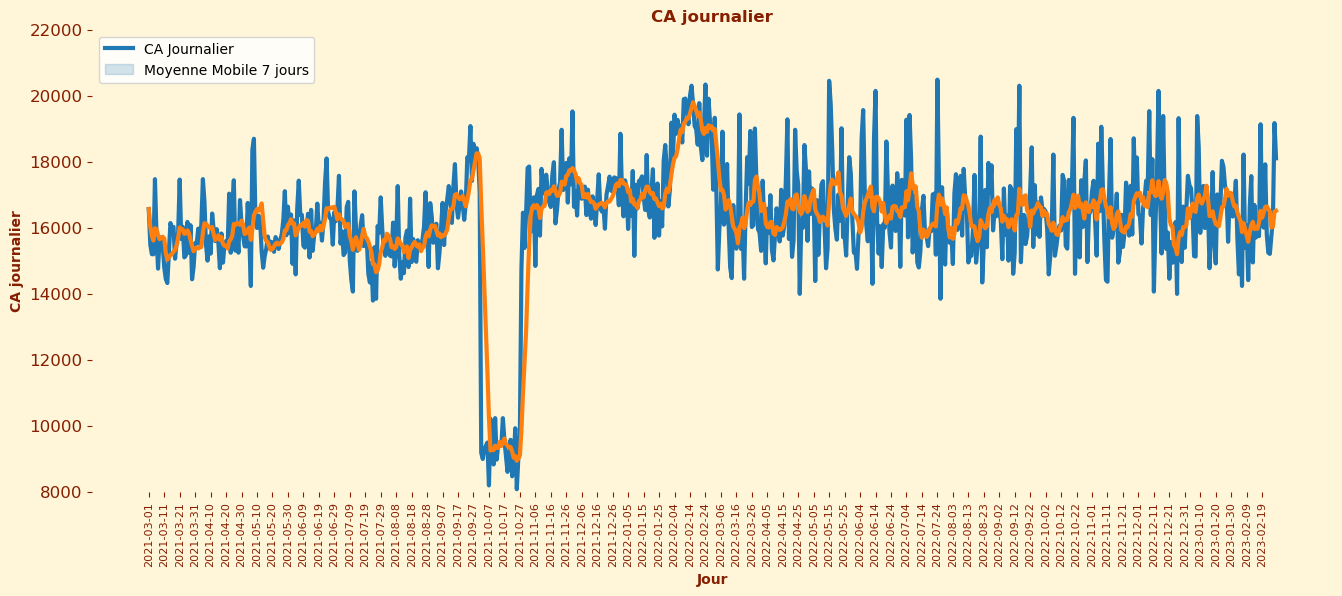

In [55]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille du graphique et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond de la partie courbe
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.lineplot(x = 'date', y = 'ca_journalier', data = requete00, linewidth = 3) # Ajout de la 1ere courbe
sns.lineplot(x = 'date', y = 'moyenne_mobile', data = requete00, linewidth = 3) # Ajout de la 2nde courbe
plot.ylim(8000, 22000) # Echelle de Y
plot.title("CA journalier", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Jour', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('CA journalier', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.xticks(numpy.arange(0, 730, 10), rotation=90, fontsize=8) 
plot.yticks(fontsize = 12) # Taille de la police axe Y
plot.legend(["CA Journalier", "Moyenne Mobile 7 jours"], loc='upper left') # Légende et position de celle ci
plot.show() # afficher le graphique

>> ### Chiffre d'Affaire Par Mois

In [56]:
# CA par mois
requete01 = donnees.copy()
requete01 = requete01.groupby(['annee_mois']).agg({'price': numpy.sum})
# ré-initilaiser l'index
requete01.reset_index(drop=False, inplace=True)
# Renommer les colonnes
requete01.rename(columns={'price' : 'ca_mensuel'}, inplace=True)
# Calculer la moyenne mobile sur 3 mois
requete01['moyenne_mobile'] = round(requete01['ca_mensuel'].rolling(window = 3, min_periods=1).mean(),2)
# Afficher les données
requete01

,annee_mois,ca_mensuel,moyenne_mobile
0,2021-03,482440.61,482440.61
1,2021-04,476109.30,479274.95
2,2021-05,492943.47,483831.13
3,2021-06,484088.56,484380.44
4,2021-07,482835.40,486622.48
5,2021-08,482284.79,483069.58
6,2021-09,507240.68,490786.96
7,2021-10,320798.74,436774.74
8,2021-11,516167.73,448069.05
9,2021-12,525917.28,454294.58


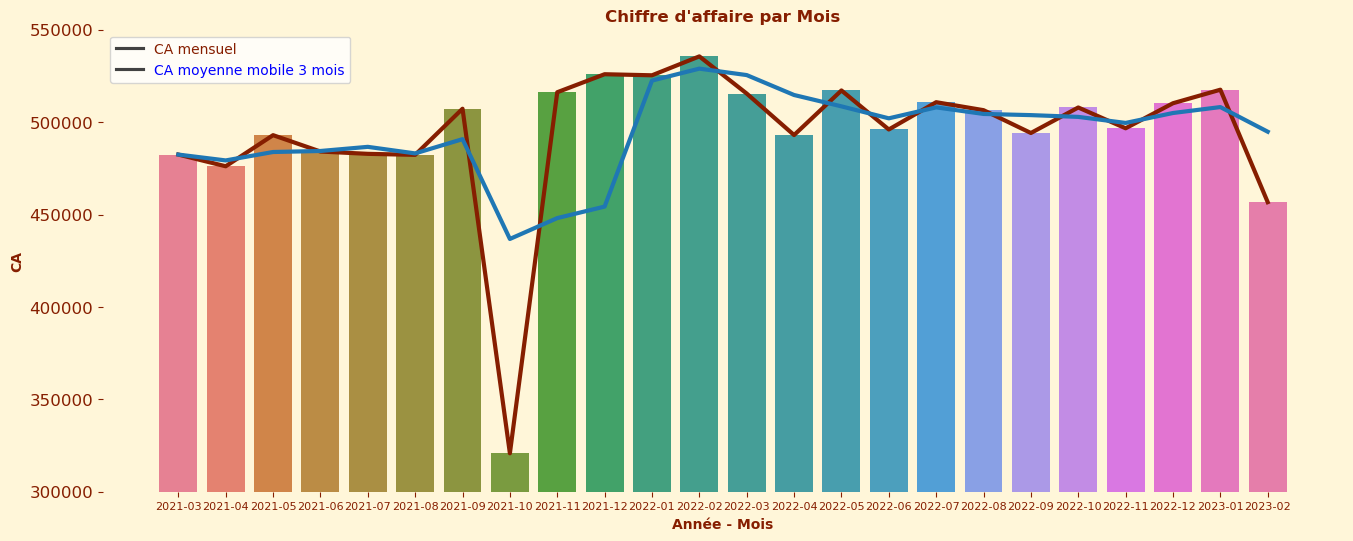

In [57]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille du graphique et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.barplot(x = 'annee_mois', y = 'ca_mensuel', data = requete01, palette='husl') # Diagramme en barre
sns.lineplot(x = 'annee_mois', y = 'ca_mensuel', data = requete01, color = '#861e00', linewidth = 3) # Ajout courbe
sns.lineplot(x = 'annee_mois', y = 'moyenne_mobile', data = requete01, linewidth = 3) # Ajout courbe 2
plot.ylim(300000, 550000) # Echelle de Y
plot.title("Chiffre d'affaire par Mois", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Année - Mois', color = '#861e00', fontweight = 'bold') #Titre axfe des X
plot.ylabel('CA', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.xticks(fontsize = 8) # Taille police axe X
plot.yticks(fontsize = 12) # Taille police axe Y
plot.legend (labels = ['CA mensuel', 'CA moyenne mobile 3 mois'], labelcolor = ['#861e00', 'blue'], loc='upper left') # Légende et position de celle ci)
plot.show()

>> ### Zoom sur le mois d'octobre 2021

In [58]:
# Filtrer sur les données d'ocotbre 2021
requete02 = donnees.copy()
requete02 = requete02.loc[requete02.annee_mois == "2021-10", ['date', 'price', 'categ']]
# Transformer la date en jour
requete02['date'] = requete02['date'].dt.strftime('%d')
# Afficher les résultats
requete02.head(8)

,date,price,categ
68,02,4.99,0.0
71,03,15.99,0.0
80,13,17.01,0.0
86,24,4.63,0.0
93,05,5.99,0.0
101,06,9.67,0.0
179,13,14.76,0.0
216,15,9.32,0.0


In [59]:
# Créez un tableau croisé dynamique
requete02 = panda.pivot_table(requete02, index = 'date', columns = 'categ', values = 'price',aggfunc=numpy.sum)
# ré-initilaiser l'index
requete02.reset_index(drop=False, inplace=True)
# Afficher les 8 premières lignes
requete02.head(8)

categ,date,0.0,1.0,2.0
0,01,6950.50,7003.79,3104.05
1,02,7141.01,NaN,2041.12
2,03,6786.57,NaN,2206.48
3,04,6533.60,NaN,2746.08
4,05,6357.91,NaN,3032.55
5,06,7546.58,NaN,1944.11
6,07,6404.01,NaN,1787.07
7,08,7069.53,NaN,3137.82


In [60]:
# Renommer les entetes de colonnes
requete02.columns= ['jour', 'categ_0', 'categ_1', 'categ_2']
# Remplacer toutes les valeurs Nan par 0
requete02.fillna(0, inplace=True)
# Afficher les données
requete02.head(8)

,jour,categ_0,categ_1,categ_2
0,01,6950.50,7003.79,3104.05
1,02,7141.01,0.00,2041.12
2,03,6786.57,0.00,2206.48
3,04,6533.60,0.00,2746.08
4,05,6357.91,0.00,3032.55
5,06,7546.58,0.00,1944.11
6,07,6404.01,0.00,1787.07
7,08,7069.53,0.00,3137.82


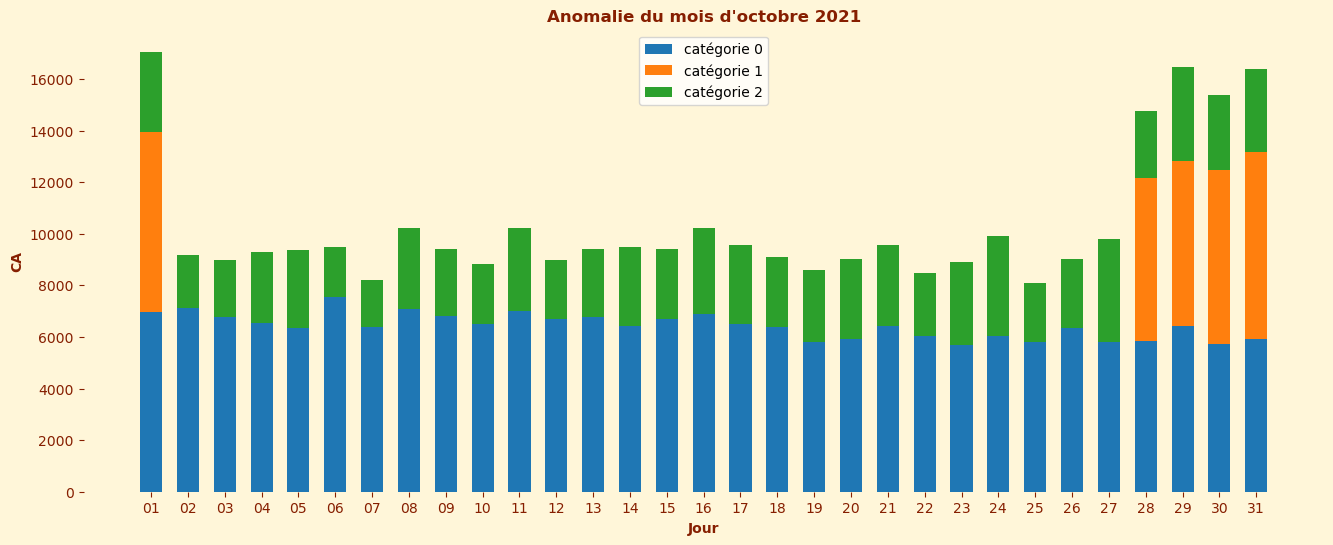

In [61]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille du graphique et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond de la partie graphique
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.title("Anomalie du mois d'octobre 2021", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.bar(requete02['jour'], requete02['categ_0'], width=0.6) # Création de la 1ere barre
plot.bar(requete02['jour'], requete02['categ_1'], width=0.6, bottom = requete02['categ_0']) #Création de la 2nde barre
plot.bar(requete02['jour'], requete02['categ_2'], width=0.6, bottom = requete02['categ_0'] + requete02['categ_1']) #Création de la 3eme barre
plot.xlabel('Jour', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('CA', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.legend(["catégorie 0", "catégorie 1", "catégorie 2"]) # légende
plot.show() # Afficher le graphiques

In [62]:
print('Il n y a pas de données entre du 02 au 27 octobre pour la categorie 1')
print('\nSuppression des données du mois d octobre car elles ne sont pas significatives, 5 jours ont les données complètes')

Il n y a pas de données entre du 02 au 27 octobre pour la categorie 1

Suppression des données du mois d octobre car elles ne sont pas significatives, 5 jours ont les données complètes


In [63]:
# Supprimer les données du mois d'octobre
donnees.drop(donnees.loc[donnees['annee_mois'] == '2021-10'].index, inplace=True)

In [64]:
# CA par mois
requete03 = donnees.copy()
requete03 = requete03.groupby(['annee_mois']).agg({'price': numpy.sum})
# ré-initilaiser l'index
requete03.reset_index(drop=False, inplace=True)
# Renommer les colonnes
requete03.rename(columns={'price' : 'ca_mensuel'}, inplace=True)
# Calculer la moyenne mobile sur 3 mois
requete03['moyenne_mobile'] = round(requete03['ca_mensuel'].rolling(window = 3, min_periods=1).mean(),2)
# Afficher les données
requete03

,annee_mois,ca_mensuel,moyenne_mobile
0,2021-03,482440.61,482440.61
1,2021-04,476109.30,479274.95
2,2021-05,492943.47,483831.13
3,2021-06,484088.56,484380.44
4,2021-07,482835.40,486622.48
5,2021-08,482284.79,483069.58
6,2021-09,507240.68,490786.96
7,2021-11,516167.73,501897.73
8,2021-12,525917.28,516441.90
9,2022-01,525338.99,522474.67


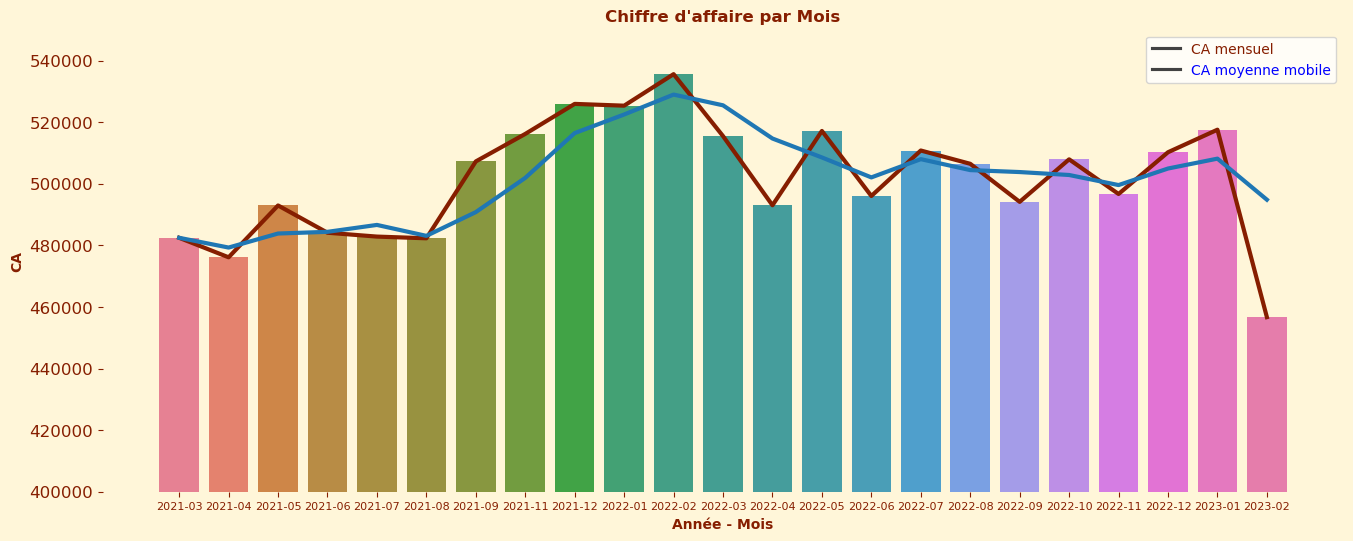

In [65]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille du graphique et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond des courbes
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.barplot(x = 'annee_mois', y = 'ca_mensuel', data = requete03, palette='husl') # Ajout de l'histogramme
sns.lineplot(x = 'annee_mois', y = 'ca_mensuel', data = requete03, color = '#861e00', linewidth = 3) # Ajout de la courbe 1
sns.lineplot(x = 'annee_mois', y = 'moyenne_mobile', data = requete03, linewidth = 3) # Ajout de la courbe 2
plot.ylim(400000, 550000) # Echelle de Y
plot.title("Chiffre d'affaire par Mois", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Année - Mois', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('CA', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.xticks(fontsize = 8) # Taille des polices de X
plot.yticks(fontsize = 12) # Taille des polices de Y
plot.legend (labels = ['CA mensuel', 'CA moyenne mobile'], labelcolor = ['#861e00', 'blue']) # Légende
plot.show() # Afficher le graphique

>> ### Zoom sur le mois de février 2022

In [66]:
# Filtrer sur les données de février 2023
requete04 = donnees.copy()
requete04 = requete04.loc[requete04.annee_mois == "2023-02", ['date', 'price', 'categ']]
# Transformer la date en jour
requete04['date'] = requete04['date'].dt.strftime('%d')
# Afficher les résultats
requete04.head(8)

,date,price,categ
12,12,15.81,1.0
21,04,3.03,0.0
44,26,4.38,0.0
46,01,20.99,1.0
69,24,9.99,0.0
70,14,17.63,1.0
77,07,18.11,1.0
94,07,23.99,1.0


In [67]:
# Créer le tableau croisé dynamique
requete04 = panda.pivot_table(requete04, index = 'date', columns = 'categ', values = 'price',aggfunc=numpy.sum)
# ré-initilaiser l'index
requete04.reset_index(drop=False, inplace=True)
# Renommer les colonnes
requete04.columns= ['jour', 'categ_0', 'categ_1', 'categ_2']
# Afficher les données
requete04.head(8)

,jour,categ_0,categ_1,categ_2
0,01,5156.63,7000.34,4561.46
1,02,4693.32,6521.95,6207.92
2,03,4848.24,6657.42,4163.89
3,04,5401.51,5880.34,3304.46
4,05,5676.46,7359.97,3074.98
5,06,5942.19,5210.84,3082.59
6,07,6585.26,5388.52,6243.24
7,08,5143.52,5286.03,4968.28


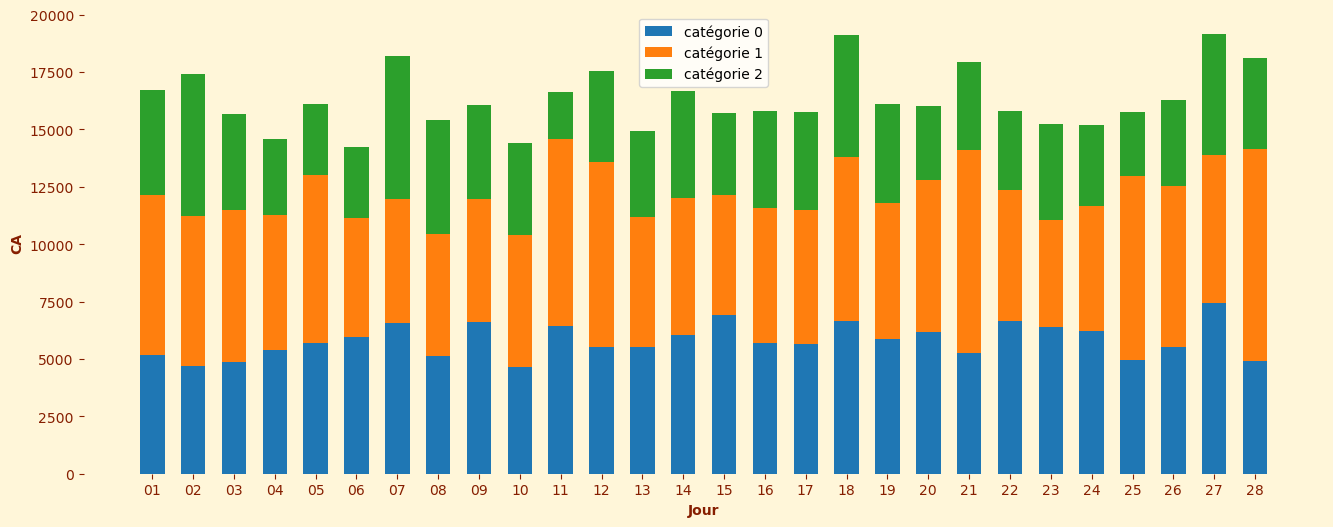

In [68]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille du graphique et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond des graphiques
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.bar(requete04['jour'], requete04['categ_0'], width=0.6) # Création de de la 1ere barre
plot.bar(requete04['jour'], requete04['categ_1'], width=0.6, bottom = requete04['categ_0']) # Creation 2nde barre au dessus de la 1ere
plot.bar(requete04['jour'], requete04['categ_2'], width=0.6, bottom = requete04['categ_0'] + requete04['categ_1']) # Création 3eme barre au dessus des 2 premierès
plot.xlabel('Jour', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('CA', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.legend(["catégorie 0", "catégorie 1", "catégorie 2"]) # Légende
plot.show()

In [69]:
print('il n y a pas d anomalie visible pour le mois de février')

il n y a pas d anomalie visible pour le mois de février


>> ### Chiffre d'affaire par mois et par catégorie

In [70]:
##### Nombre de ventes par mois
requete05 = donnees.copy()
requete05 = requete05.groupby(['annee_mois','categ']).agg({'price': numpy.sum})
# ré-initilaiser l'index
requete05.reset_index(drop=False, inplace=True)
# Renommer les colonnes
requete05.rename(columns={'price':'ca_mensuel'}, inplace=True)
requete05.head(8)

,annee_mois,categ,ca_mensuel
0,2021-03,0.0,193629.17
1,2021-03,1.0,186974.17
2,2021-03,2.0,101837.27
3,2021-04,0.0,205222.46
4,2021-04,1.0,156138.35
5,2021-04,2.0,114748.49
6,2021-05,0.0,196186.72
7,2021-05,1.0,165893.40


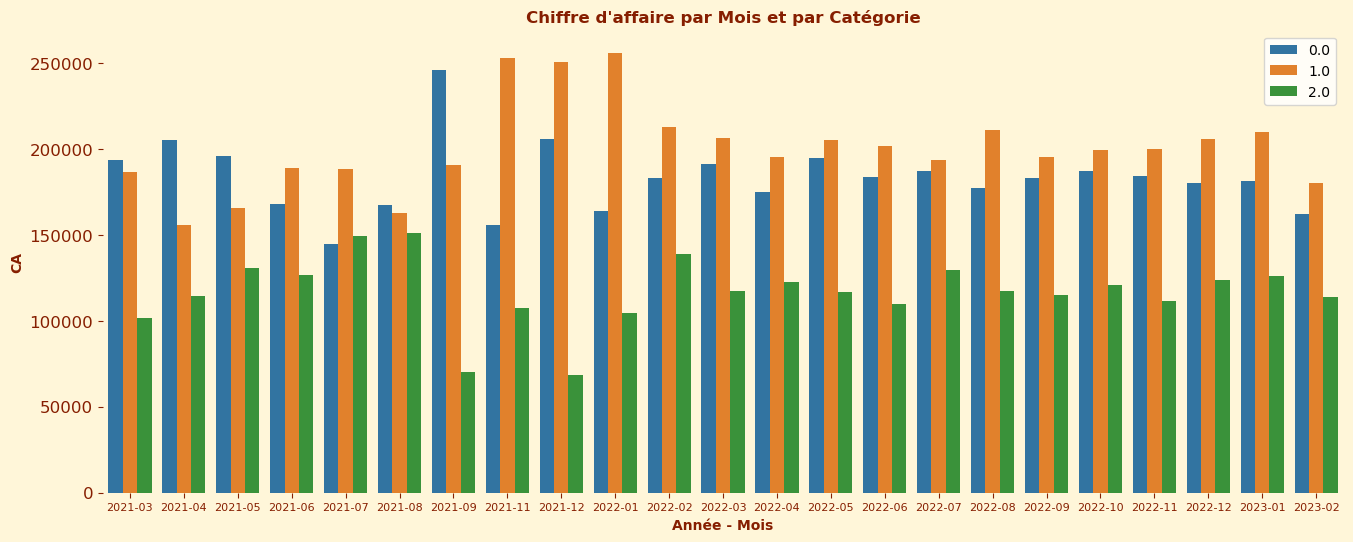

In [71]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Création du graphique avec taille et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond de la partie graphique
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.barplot(x = 'annee_mois', y = 'ca_mensuel', data = requete05, hue = 'categ', dodge= True, palette=['#1f77b4', '#ff7f0e', '#2ca02c']) # Ajout des histogrammes avec hue
plot.title("Chiffre d'affaire par Mois et par Catégorie", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Année - Mois', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('CA', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.xticks(fontsize = 8) # Taille de la police en X
plot.yticks(fontsize = 12) # Taille de la police en Y
plot.legend() # Légende
plot.show() # Afficher le graphique

>> ### Nombre de Ventes par mois

In [72]:
# Nombre de ventes par mois
requete06 = donnees.copy()
requete06 = requete06.groupby(['annee_mois']).count()
# ré-initilaiser l'index
requete06.reset_index(drop=False, inplace=True)
# Supprimler les colonnes inutiles
requete06.drop(columns=['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth', 'categ', 'age'], inplace=True)
# Renommer les colonnes
requete06.rename(columns={'price':'nb_ventes'}, inplace=True)
# Afficher les données
requete06.head(8)

,annee_mois,nb_ventes
0,2021-03,28601
1,2021-04,28443
2,2021-05,28285
3,2021-06,26850
4,2021-07,24738
5,2021-08,25650
6,2021-09,33314
7,2021-11,28311


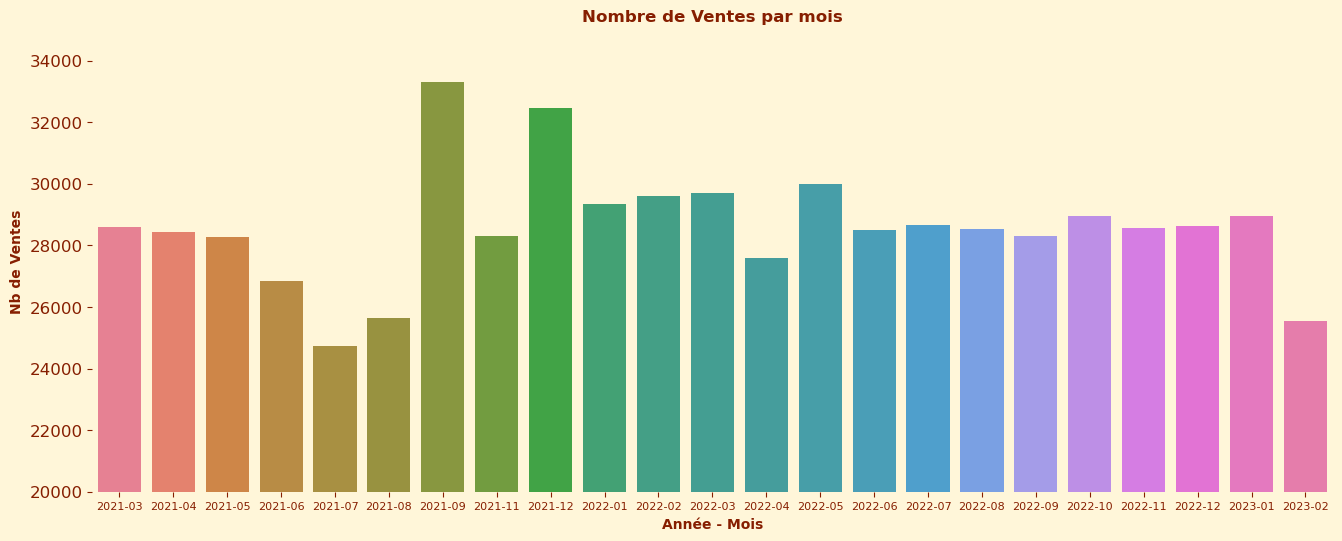

In [73]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille du graphique et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond du graphique
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.barplot(x = 'annee_mois', y = 'nb_ventes', data = requete06, palette='husl') # Ajout des diagrammes en barres
plot.ylim(20000, 35000) # Echelle de Y
plot.title('Nombre de Ventes par mois', color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Année - Mois', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('Nb de Ventes', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.xticks(fontsize = 8) # Taille police en X
plot.yticks(fontsize = 12) # Taille police en Y
plot.show() # Afficher le graphique

>> ### Nombre de Ventes par mois et par catégorie

In [74]:
##### Nombre de ventes par mois
requete07 = donnees.copy()
requete07 = requete07.groupby(['annee_mois','categ']).count()
# ré-initilaiser l'index
requete07.reset_index(drop=False, inplace=True)
# Supprimler les colonnes inutiles
requete07.drop(columns=['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth'], inplace=True)
# Renommer les colonnes
requete07.rename(columns={'price':'nb_ventes'}, inplace=True)
# Afficher les données
requete07.head(8)

,annee_mois,categ,nb_ventes,age
0,2021-03,0.0,18131,18131
1,2021-03,1.0,9134,9134
2,2021-03,2.0,1336,1336
3,2021-04,0.0,19342,19342
4,2021-04,1.0,7579,7579
5,2021-04,2.0,1522,1522
6,2021-05,0.0,18501,18501
7,2021-05,1.0,8107,8107


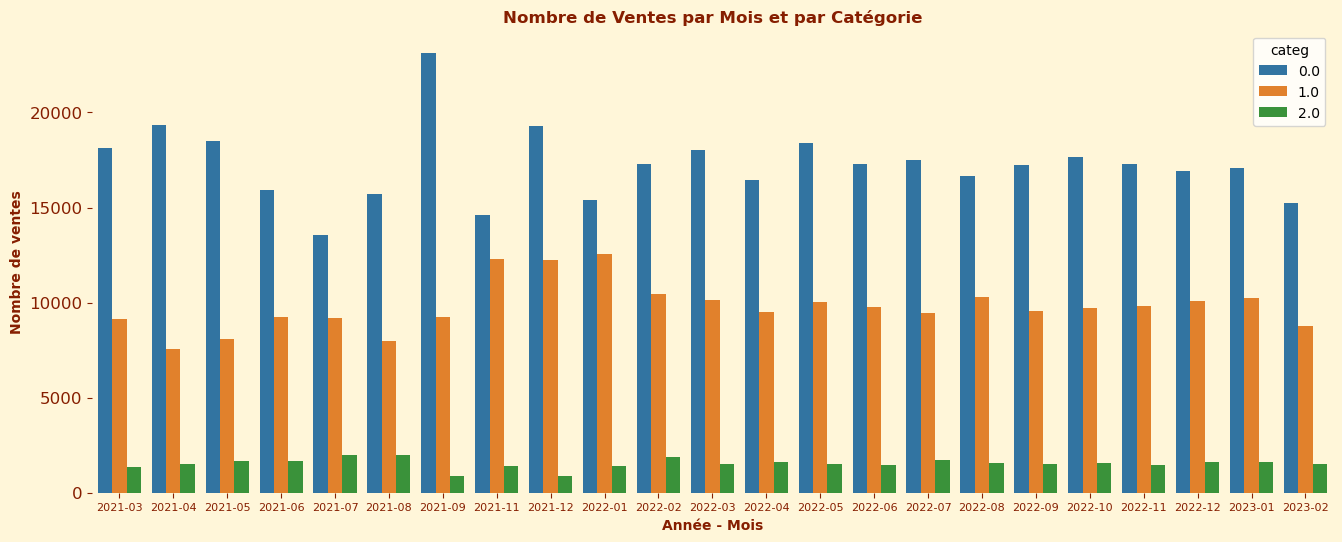

In [75]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.barplot(x = 'annee_mois', y = 'nb_ventes', data = requete07, hue = 'categ', dodge= True, palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
#plot.ylim(0, 2) # Echelle de Y
plot.title("Nombre de Ventes par Mois et par Catégorie", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Année - Mois', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('Nombre de ventes', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.xticks(fontsize = 8)
plot.yticks(fontsize = 12)
plot.legend 
plot.show(); 

In [76]:
requete07 = donnees.copy()
requete07 = panda.pivot_table(requete07, index = 'annee_mois', columns = 'categ', values = 'id_prod',aggfunc=numpy.count_nonzero)
# ré-initilaiser l'index
requete07.reset_index(drop=False, inplace=True)
# Renommer les colonnes
requete07.columns= ['annee_mois', 'vente_categ_0', 'vente_categ_1', 'vente_categ_2']
requete07.head()

,annee_mois,vente_categ_0,vente_categ_1,vente_categ_2
0,2021-03,18131,9134,1336
1,2021-04,19342,7579,1522
2,2021-05,18501,8107,1677
3,2021-06,15898,9264,1688
4,2021-07,13578,9169,1991


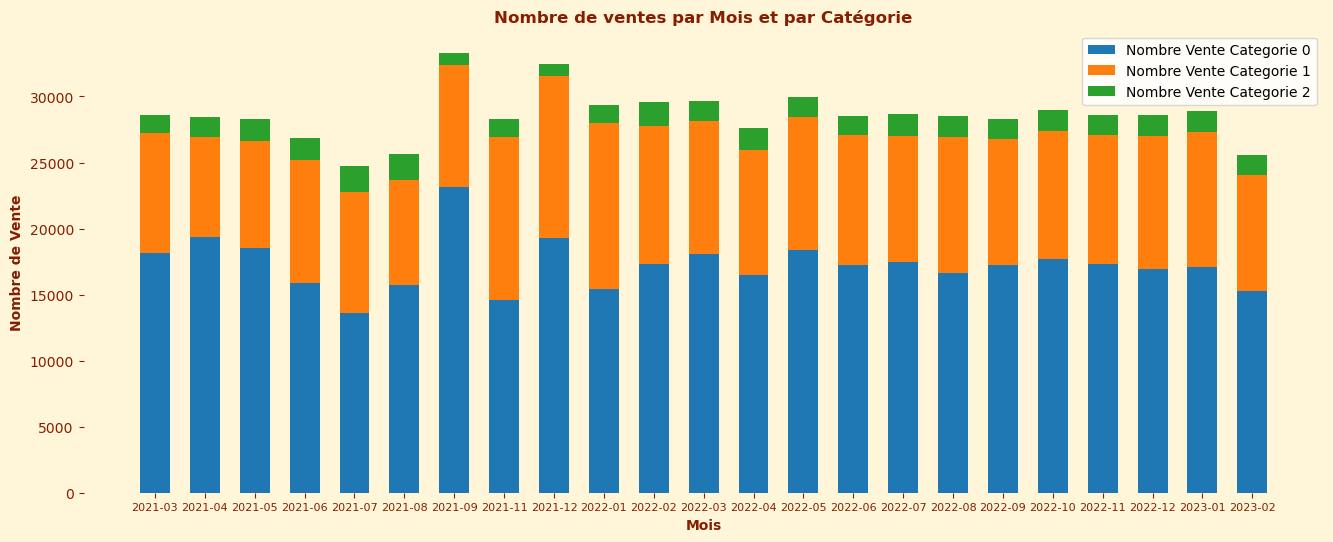

In [77]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.bar(requete07['annee_mois'], requete07['vente_categ_0'], width=0.6)
plot.bar(requete07['annee_mois'], requete07['vente_categ_1'], width=0.6, bottom = requete07['vente_categ_0'])# Création de l'histogramme
plot.bar(requete07['annee_mois'], requete07['vente_categ_2'], width=0.6, bottom = requete07['vente_categ_0'] + requete07['vente_categ_1'])
plot.xlabel('Mois', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('Nombre de Vente', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.xticks(fontsize = 8)
plot.title("Nombre de ventes par Mois et par Catégorie", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.legend(["Nombre Vente Categorie 0", "Nombre Vente Categorie 1", "Nombre Vente Categorie 2"])
plot.show();

> ## Les références

>> ### Le TOP 20 des livres les plus vendus

In [78]:
##### Nombre de ventes par mois
requete08 =donnees.copy()
# Grouper en comptant le nombre de venter
requete08 = requete08.groupby(['id_prod','price','categ']).agg({'id_prod': numpy.count_nonzero})
# renommer la colonne id_prod en Nb de ventes
requete08.columns= ['nb_ventes']
# Afficher les 20 premières ventes par ordre decroissant
requete08.sort_values(by = ['nb_ventes', 'id_prod'], ascending=False).head(20)

,,,nb_ventes
id_prod,price,categ,
1_369,23.99,1.0,2237
1_417,20.99,1.0,2173
1_414,23.83,1.0,2166
1_498,23.37,1.0,2117
1_425,16.99,1.0,2084
1_403,17.99,1.0,1950
1_412,16.65,1.0,1938
1_413,17.99,1.0,1931
1_406,24.81,1.0,1931


>> ### Le TOP 20 des livres les moins vendus

In [79]:
# Afficher les 20 premières ventes par ordre croissant
requete08.sort_values(by = ['nb_ventes', 'id_prod'], ascending=True).head(20)

,,,nb_ventes
id_prod,price,categ,
0_1151,2.99,0.0,1
0_1284,1.38,0.0,1
0_1498,2.48,0.0,1
0_1533,27.99,0.0,1
0_1539,0.99,0.0,1
0_1595,2.99,0.0,1
0_1601,1.99,0.0,1
0_1633,24.99,0.0,1
0_1683,2.99,0.0,1


> ## Profil des clients

>> ### Age des Clients

In [80]:
# Filtrer sur les client_id, age et sexe.
requete11 = donnees.copy()
requete11= requete11[['client_id','age','sex']].sort_values(["client_id", "age"], ascending= (True, True))
# Supprimer les doubloins de clients
requete11 = requete11.drop_duplicates(subset=['client_id'], keep="last")
# Trier les données par ordre croissants
requete11 = requete11.sort_values("age", ascending=True)
# re-initialiser l'index et renommer la colonne
requete11 = requete11.groupby(['age','sex']).size().reset_index(name='nb_personnes')
# Afficher les données
requete11.head(8)

,age,sex,nb_personnes
0,19,f,231
1,19,m,206
2,20,f,65
3,20,m,80
4,21,f,65
5,21,m,80
6,22,f,70
7,22,m,55


In [81]:
# Créer le tableau croisé Dynamique
requete11 = panda.pivot_table(requete11, index = 'age', columns = 'sex',values = 'nb_personnes',aggfunc=numpy.sum) 
# ré-initilaiser l'index
requete11.reset_index(drop=False, inplace=True)
# Renommer les colonnes
requete11.columns= ['age', 'femmes', 'hommes']
# Afficher les données
requete11.head(8)

,age,femmes,hommes
0,19,231,206
1,20,65,80
2,21,65,80
3,22,70,55
4,23,78,58
5,24,79,80
6,25,70,67
7,26,76,75


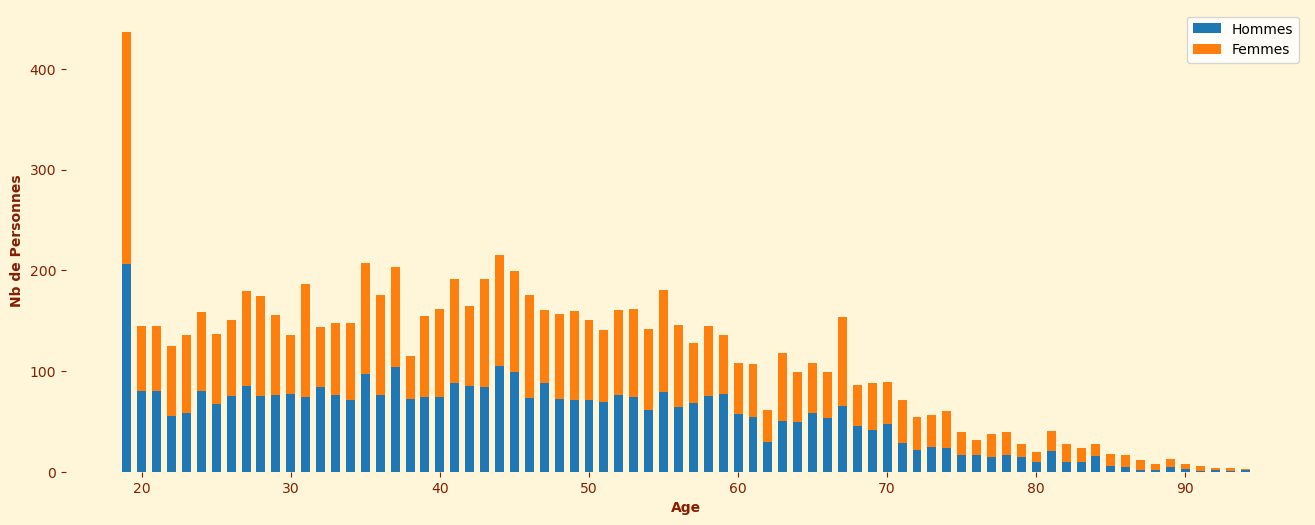

In [82]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille du graphique et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond du graphique
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.bar(requete11['age'], requete11['hommes'], width=0.6) # Ajout du 1er diagramme en barre
plot.bar(requete11['age'], requete11['femmes'], width=0.6, bottom = requete11['hommes']) # Ajout du 2nd au bout du premier
plot.xlabel('Age', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel('Nb de Personnes', color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.legend(["Hommes", "Femmes"]) # Légende
plot.show() # Afficher le graphique

>> ### Répartition du CA par client

In [83]:
# Filtrer sur le nombre de livres acheté et le CA par client
requete09 = donnees.copy()
requete09 = requete09.groupby('client_id')['price'].agg(['count', 'sum']).sort_values('count', ascending=False)
# Renommer la colonne
requete09 =requete09.rename(columns={'count':'nombre_de_ventes', 'sum': 'ca'})
#Trier par CA décroissant
requete09 = requete09.sort_values('ca', ascending=False).reset_index()
# Afficher les résultats
requete09.head(8)

,client_id,nombre_de_ventes,ca
0,c_1609,24472,312755.08
1,c_4958,5090,282654.61
2,c_6714,8897,149783.75
3,c_3454,6632,111766.71
4,c_2899,105,5214.05
5,c_1570,356,5136.14
6,c_3263,392,5129.89
7,c_7319,368,5120.55


In [84]:
#Trier par nombre de ventes décroissantes
requete09 = requete09.sort_values('nombre_de_ventes', ascending=False)
# Afficher les résultats
requete09.head(8)

,client_id,nombre_de_ventes,ca
0,c_1609,24472,312755.08
2,c_6714,8897,149783.75
3,c_3454,6632,111766.71
1,c_4958,5090,282654.61
6,c_3263,392,5129.89
14,c_2595,384,4778.69
10,c_2140,381,4949.96
31,c_2077,370,4635.37


In [85]:
# Top 4 clients en CA
caTop4Client = 100 * requete09.head(4).ca.sum() / requete09.ca.sum()
print("Ces 4 clients rapportent", round(requete09.head(4).ca.sum()/1000, 2),
      "K€, soit",  round(caTop4Client, 2), "% du CA total. Ce sont sans doute des professionnels.")
print('')
#Top 4 des clients en ventes
venteTop4Client = 100 * requete09.head(4).nombre_de_ventes.sum() / requete09.nombre_de_ventes.sum()
print("Ces 4 clients rapportent", requete09.head(4).nombre_de_ventes.sum(),
      "ventes, soit",  round(venteTop4Client, 2), "% des ventes totales.")

Ces 4 clients rapportent 856.96 K€, soit 7.43 % du CA total. Ce sont sans doute des professionnels.

Ces 4 clients rapportent 45091 ventes, soit 6.86 % des ventes totales.


In [86]:
#Enregistrement des 4 gros Clients dans un dataFrame
top4Client = donnees[(donnees['client_id'] == 'c_1609') | (donnees['client_id'] == 'c_4958') 
                      | (donnees['client_id'] == 'c_6714') | (donnees['client_id'] == 'c_3454')]
top4Client

,id_prod,date,session_id,client_id,sex,birth,price,categ,age,annee_mois
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0,55,2022-06
17,1_661,2022-09-13 10:18:02.746197,s_267366,c_6714,f,1968,22.99,1.0,55,2022-09
32,1_426,2021-06-21 17:47:57.023863,s_51846,c_4958,m,1999,19.44,1.0,24,2021-06
63,1_506,2021-09-29 03:52:29.731798,s_97203,c_4958,m,1999,13.65,1.0,24,2021-09
67,0_1446,2022-10-05 07:43:00.225116,s_278030,c_1609,m,1980,8.09,0.0,43,2022-10
...,...,...,...,...,...,...,...,...,...,...
678974,0_1441,2021-08-31 11:25:29.198346,s_83113,c_1609,m,1980,18.99,0.0,43,2021-08
679008,0_1419,2021-04-02 13:23:57.034357,s_14951,c_1609,m,1980,8.99,0.0,43,2021-04
679032,2_185,2021-03-08 01:39:03.755607,s_3255,c_4958,m,1999,43.99,2.0,24,2021-03
679081,0_1442,2022-07-24 00:48:15.130619,s_242786,c_6714,f,1968,4.89,0.0,55,2022-07


In [87]:
# Suppression des 4 gros Clients des données clients
#donnees.drop(donnees[donnees['client_id'].str.contains('c_1609')].index,inplace = True)
#donnees.drop(donnees[donnees['client_id'].str.contains('c_4958')].index,inplace = True)
#donnees.drop(donnees[donnees['client_id'].str.contains('c_6714')].index,inplace = True)
#donnees.drop(donnees[donnees['client_id'].str.contains('c_3454')].index,inplace = True)
#donnees.info()

>> ### Courbes de Lorentz

In [88]:
# Courbe de Lorenz
requete10 = donnees.copy()
# Calculer le nombre de clients et les différents prix
nbClients = len(requete10.client_id)
ca = requete10.price.values
# Indicateurs de la courbe de Lorenz
lorenz = numpy.cumsum(numpy.sort(ca)) / ca.sum()
lorenz = numpy.append([0],lorenz) # La courbe de Lorenz commence à 0
medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection
xaxis = numpy.linspace(0-1/nbClients ,1+1/nbClients ,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
mediane = lorenz[int(round(len(lorenz)) / 2)] # Calcul de la médiane

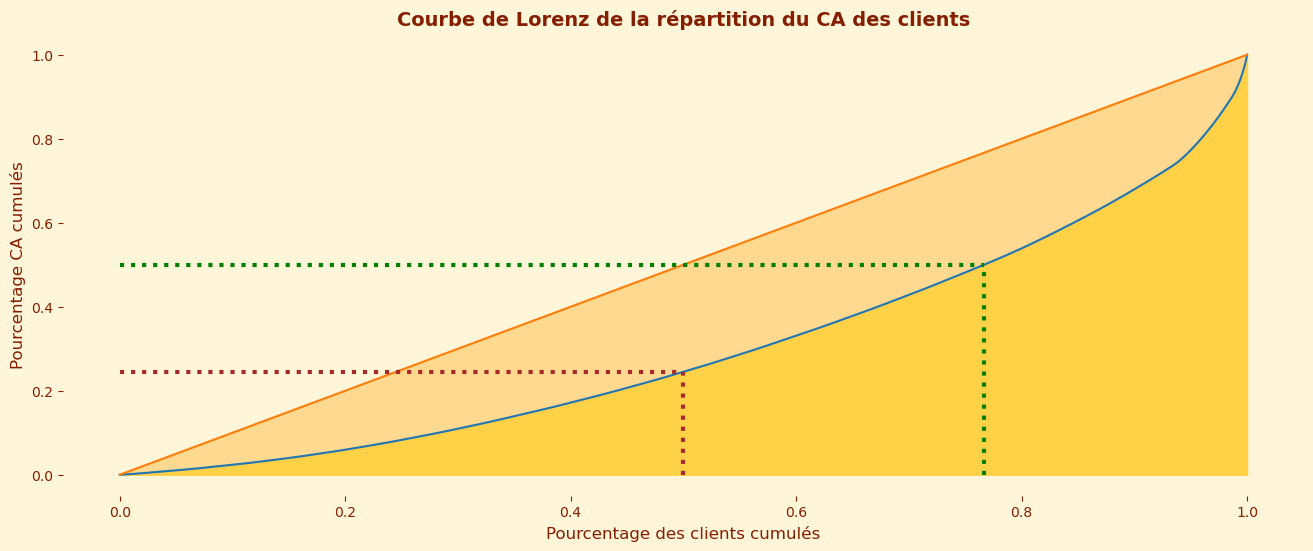

In [89]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Création du graphique avec taille et couleur de fond
plot.gca().set_facecolor('#fff6d9') # Couleur de fond de la partie Graphe
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.plot(xaxis,lorenz,drawstyle='steps-post',label = 'Courbe de Lorenz') #Traçage courbe de Lorentz
plot.plot([0,1], [0,1], label = 'Première bissectrice') #tracer la bisséctrice
plot.plot([0, medial], [0.5, 0.5], color='green', linestyle=':', linewidth=3, label="Médiale") # medial en X
plot.plot([medial, medial], [0, 0.5], color='green', linestyle=':', linewidth=3) # Médial en Y
plot.plot([0, 0.5], [mediane, mediane], color='brown', linestyle=':', linewidth=3) # Médiane en X
plot.plot([0.5, 0.5], [0, mediane], color='brown', linestyle=':', linewidth=3, label="Médiane") # Médiane en Y 
plot.fill_between(numpy.linspace(0,1,len(lorenz)) ,lorenz , color='#ffd146') # Colorier la courbe entre courbe de Lorenz et la bissectrice
plot.fill_between(xaxis, xaxis, lorenz, color='#ffbd47', alpha=0.5) # Colorier la courbe entre abcissses et courbe de Lorenz
plot.title('Courbe de Lorenz de la répartition du CA des clients',fontsize = 14, color ='#861e00',  fontweight = 'bold') # Titre
plot.xlabel('Pourcentage des clients cumulés', fontsize=12, color ='#861e00') # Titre et taille de labels en X
plot.ylabel('Pourcentage CA cumulés', fontsize=12, color ='#861e00')  # Titre et taille de labels en Y
plot.show() # Afficher le graphique

In [90]:
# Calcul de l'indice de Gini
AUC = (lorenz.sum() - lorenz[-1]/2 -lorenz[0]/2)/nbClients # Surface sous la courbe de Lorenz. 
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
# Affichage du coefficient de Gini
print (f"L'indice de gini vaut {gini:.2f}. Cela veut dire que les prix pratiqués sont plutôt équitables.")
print("")
print(f"La dépense Médiane se situe à {mediane:.2%} et La dépense médiale se situe à {medial:.2%}")

L'indice de gini vaut 0.39. Cela veut dire que les prix pratiqués sont plutôt équitables.

La dépense Médiane se situe à 24.51% et La dépense médiale se situe à 76.67%


# - Recherche de corrélation entre les variables

> ## Lien entre le genre d'un client de les catégories de livres achetés

In [91]:
# Liste des colonnes numériques
colonnes_numeriques = donnees.select_dtypes(include=['float64', 'int64'])
# Calcul de la matrice de corrélation
correlation01 = colonnes_numeriques.corr()
correlation01.head()

,birth,price,categ,age
birth,1.000000,0.208680,0.097189,-1.000000
price,0.208680,1.000000,0.669607,-0.208680
categ,0.097189,0.669607,1.000000,-0.097189
age,-1.000000,-0.208680,-0.097189,1.000000


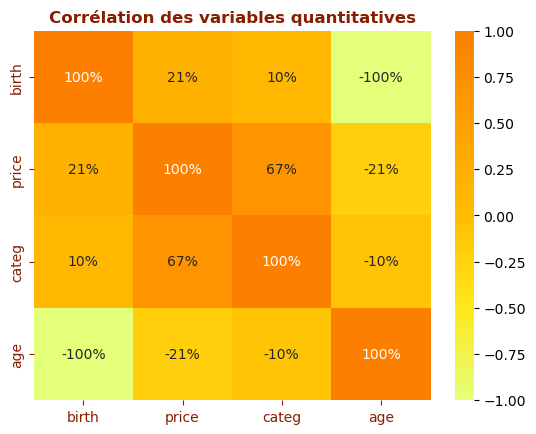

In [92]:
#Heatmap de la correlation
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
sns.heatmap(correlation01, annot=True, fmt=".0%", cmap='Wistia') # Afficher de la carte
plot.title('Corrélation des variables quantitatives', color = '#861e00', fontweight = 'bold') # Titre
plot.show() # Afficher le graphique

In [93]:
# Créer le tableau de contingence des valeurs observées 'sex' et 'categ'
contigence01 = donnees[['sex','categ']].pivot_table(index='sex', columns='categ', aggfunc=len,margins=True,margins_name="total")
# Récupérer les Totaux sur chaque axe
totalX = contigence01.loc[:,['total']] 
totalY = contigence01.loc[['total'],:] 
# Déterminer le Nombre de valeurs observés
nombreValeurs =  contigence01.loc['total', 'total']  # **Sélectionne la dernière Ligne et la dernière Colonne**
print(nombreValeurs)

657512


In [94]:
# Produit Matriciel en transposant la matrice totalY
nouvelleMatrice = (totalX.dot(totalY) / nombreValeurs)
# Matrice "écart au carré normalisé de la valeur attendue VS valeur observée"
mesure = (contigence01-nouvelleMatrice)**2/nouvelleMatrice
#Calcul du Chi2
#Tester l’hypothèse nulle consiste à comparer les occurrences observées (celles déjà dans le tableau) avec les occurrences attendues.
chi2 = mesure.sum().sum()
table = (mesure/chi2)
print("Chi² calculé :", chi2)
print("\nContributions au Chi² (non normalisées) :\n", mesure)
print("\nContributions normalisées (0-1) :\n", table)

Chi² calculé : 143.5555396400573

Contributions au Chi² (non normalisées) :
 categ       0.0        1.0        2.0  total
sex                                         
f      3.097651  24.661737  44.228198    0.0
m      3.079594  24.517978  43.970381    0.0
total  0.000000   0.000000   0.000000    0.0

Contributions normalisées (0-1) :
 categ       0.0       1.0       2.0  total
sex                                       
f      0.021578  0.171792  0.308091    0.0
m      0.021452  0.170791  0.306295    0.0
total  0.000000  0.000000  0.000000    0.0


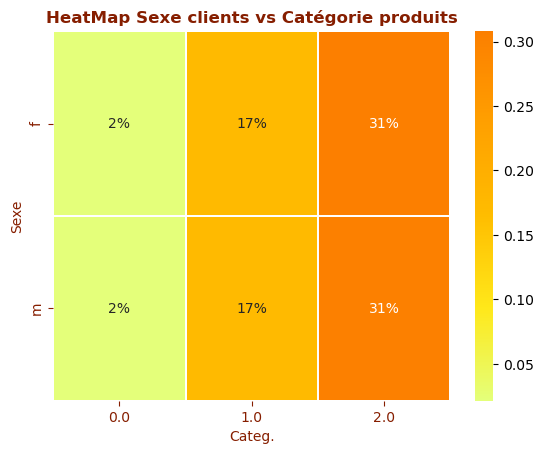

In [95]:
#HeatMap 
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
sns.heatmap(table.iloc[:-1,:-1], annot=True, cmap="Wistia", fmt=".0%", linewidths=0.1)
plot.title('HeatMap Sexe clients vs Catégorie produits', color = '#861e00', fontweight = 'bold')
plot.xlabel('Categ.', color = '#861e00')
plot.ylabel('Sexe', color = '#861e00')
plot.show()

In [96]:
# Afficher la contigence
contigence01

categ,0.0,1.0,2.0,total
sex,,,,
f,196986,114087,16722,327795
m,199711,111416,18590,329717
total,396697,225503,35312,657512


In [97]:
# Afficher les données Calculés
nouvelleMatrice

categ,0.0,1.0,2.0,total
sex,,,,
f,197768.699453,112421.911516,17604.38903,327795.0
m,198928.300547,113081.088484,17707.61097,329717.0
total,396697.000000,225503.000000,35312.00000,657512.0


In [98]:
# Afficher les valeurs de : chi2 observé, p-value, degré de liberté, les resultas attendus
scipystats_chi2, scipystats_p, scipystats_dof, scipystats_exp = scipystats.chi2_contingency(contigence01)
print('chi2 observé :', scipystats_chi2,'\n\np-value :',scipystats_p,'\n\ndegré de liberté :',scipystats_dof,'\n\nresultas attendus :',scipystats_exp)

chi2 observé : 143.5555396400573 

p-value : 1.7797545892014317e-28 

degré de liberté : 6 

resultas attendus : [[197768.69945339 112421.91151644  17604.38903016 327795.        ]
 [198928.30054661 113081.08848356  17707.61096984 329717.        ]
 [396697.         225503.          35312.         657512.        ]]


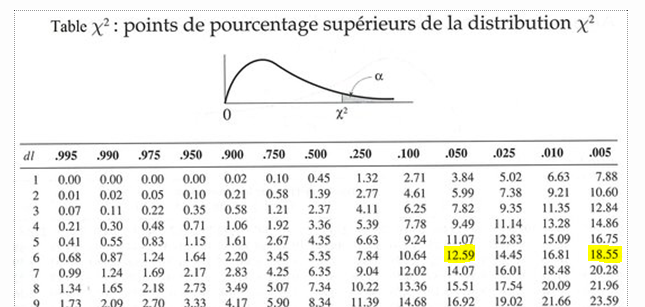

In [99]:
print('Seuil Thérique du Chi2 : 12,59 avec un dégré de liberté de 6 pour un p-value de 5%')
print('\nLe Chi2 observé est > au Chi2 seuil donc on peut en déduire que l hypothèse H0 est bien rejetée')
print('\nIl y a bien une dépendance entre la variable sexe et la catégorie des produits achetés')

Seuil Thérique du Chi2 : 12,59 avec un dégré de liberté de 6 pour un p-value de 5%

Le Chi2 observé est > au Chi2 seuil donc on peut en déduire que l hypothèse H0 est bien rejetée

Il y a bien une dépendance entre la variable sexe et la catégorie des produits achetés


> ## Lien entre l'age des clients et le montant total des achats

In [100]:
# Créer le nouveau DataFrame et Ajouter la colonne Age
correlation02 = donnees.copy()
# Grouper par l'age, pour calculer le nombre d'achat et le montant total des achats par âge
correlation02 = correlation02.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum', ascending = False).reset_index()
# Renommer les colonnes
correlation02 = correlation02.rename(columns={'count':'nombre_de_ventes', 'sum': 'ca'})
# Afficher les données
correlation02.head(8)

,age,nombre_de_ventes,ca
0,43,45618,593531.67
1,19,14769,591414.23
2,24,10019,476934.53
3,44,23924,323400.70
4,35,24168,321409.83
5,45,23834,315423.63
6,37,22567,299112.68
7,55,17681,298715.76


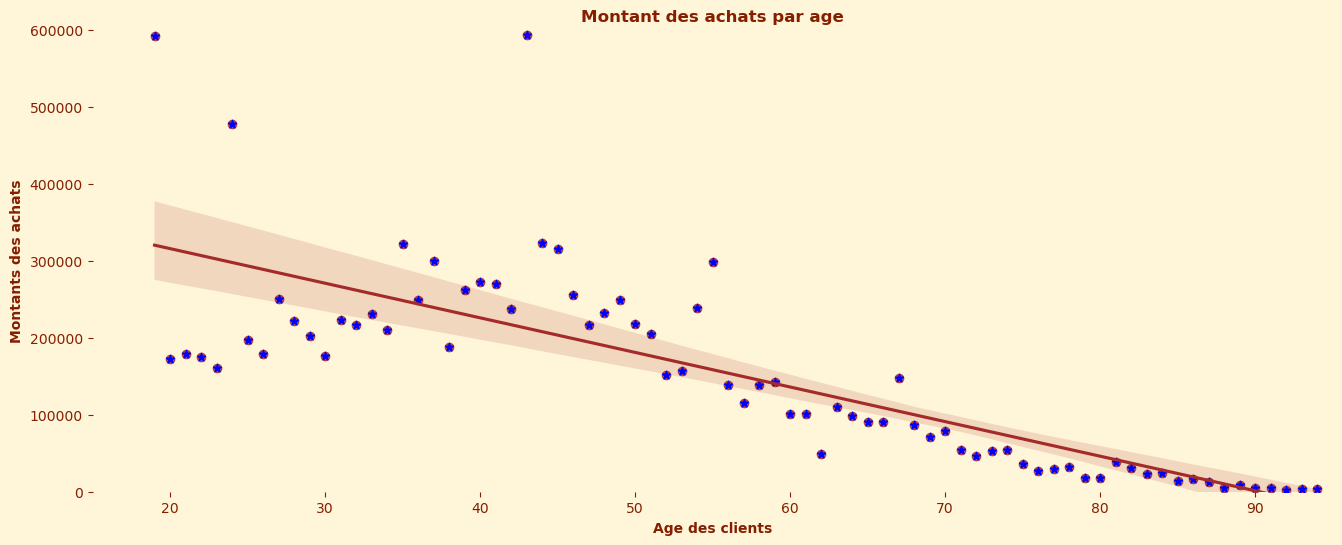

In [101]:
# Graphique en nuage de point plot.figure()
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille Figure et couleur du fond du cadre
plot.gca().set_facecolor('#fff6d9') # Couleur de fond de la courbe
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.regplot(x='age', y='ca', data =correlation02, color= "brown") # Regression Linéaire
plot.scatter(x = correlation02['age'], y = correlation02['ca'], color = 'blue', marker = '*') #Nuage de Pint
plot.ylim(0, 600000) # Echelle de Y
plot.xlim(15, 95) # Echelle de X
plot.title("Montant des achats par age", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Age des clients', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel("Montants des achats", color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.show() # Afficher le graphique

In [102]:
#Test de corrélation Pearson - avec les variables  « âge » et « CA»
pearson_coeff, pvalue = scipystats.pearsonr(correlation02['age'], correlation02['ca'])
print('Le coefficient de Pearson est de {:.3f}, La P-value est de {:.20f}'.format(pearson_coeff, pvalue))

Le coefficient de Pearson est de -0.779, La P-value est de 0.00000000000000011570


> ## Lien entre l'age des clients et la fréquence d'achat
La fréquence d'achat est le nombre d'achat par age.

In [103]:
correlation03 = donnees.copy()
# Grouper les données par clients et age en comptant le nombre de sessions
correlation03 = correlation03.groupby(['client_id', 'age'])['session_id'].count().reset_index(name='nb_ventes')
# Grouper par age en comptant le nombre de clients et la somme des ventes
correlation03 = correlation03.groupby('age').agg({'client_id':['count'],'nb_ventes':['sum']}).reset_index()
# Suppression du 2ème niveau d multi index
correlation03.columns = ['_'.join(x) for x in correlation03.columns.to_flat_index()]
# Renommer les Colonnes
correlation03.rename(columns={'age_':'age','client_id_count': 'nb_clients', 'nb_ventes_sum':'nb_ventes'}, inplace=True)
correlation03['frequence_achat'] = correlation03['nb_ventes'] / correlation03['nb_clients']
correlation03

,age,nb_clients,nb_ventes,frequence_achat
0,19,437,14769,33.796339
1,20,145,4238,29.227586
2,21,145,4465,30.793103
3,22,125,4161,33.288000
4,23,136,4297,31.595588
...,...,...,...,...
71,90,8,314,39.250000
72,91,6,293,48.833333
73,92,4,164,41.000000
74,93,4,222,55.500000


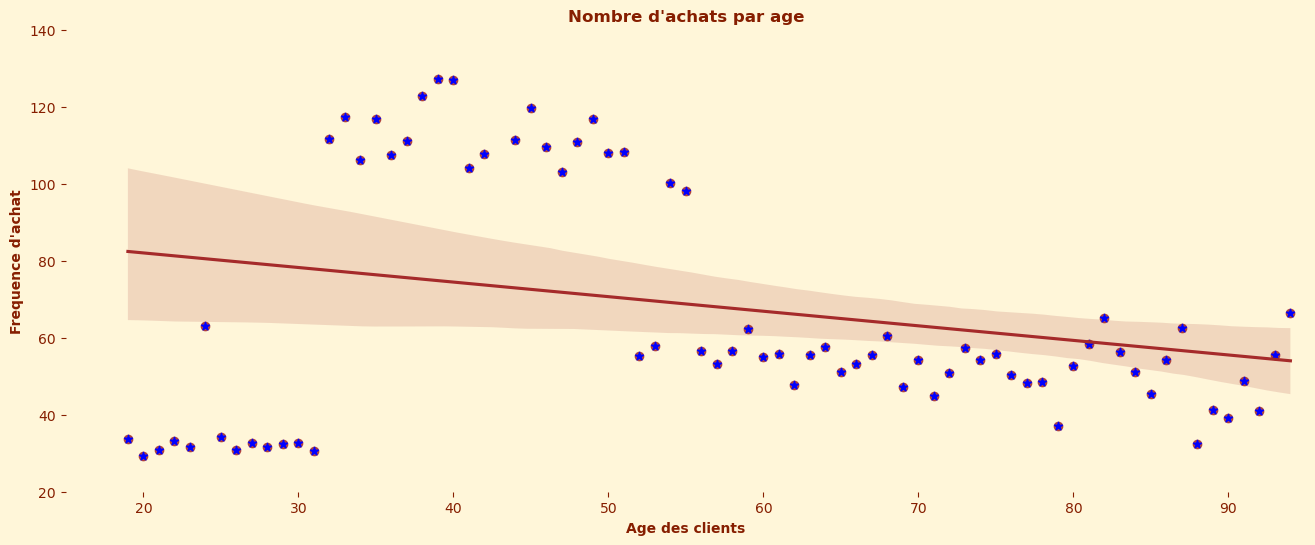

In [104]:
# Graphique en nuage de point plot.figure()
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Taille figure et couleur de fond du cadre
plot.gca().set_facecolor('#fff6d9') # Couleur de fond de la courbe
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.regplot(x='age', y='frequence_achat', data =correlation03, color='brown') # Regression linéaire (droite au plus proche des points)
plot.scatter(x = correlation03['age'], y = correlation03['frequence_achat'], color = 'blue', marker = '*') # Nuage de point
plot.ylim(20, 140) # Echelle de Y
plot.xlim(15, 95) # Echelle de X
plot.title("Nombre d'achats par age", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Age des clients', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel("Frequence d'achat", color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.show() # Afficher le graphique

In [105]:
# Identifier les différents groupe de clients
clients1830 = correlation03[correlation03['age'] < 31]
clients3150 = correlation03[(correlation03['age'] >= 31) & (correlation03['age'] < 51)] 
clients51etplus = correlation03[correlation03['age'] >= 51]

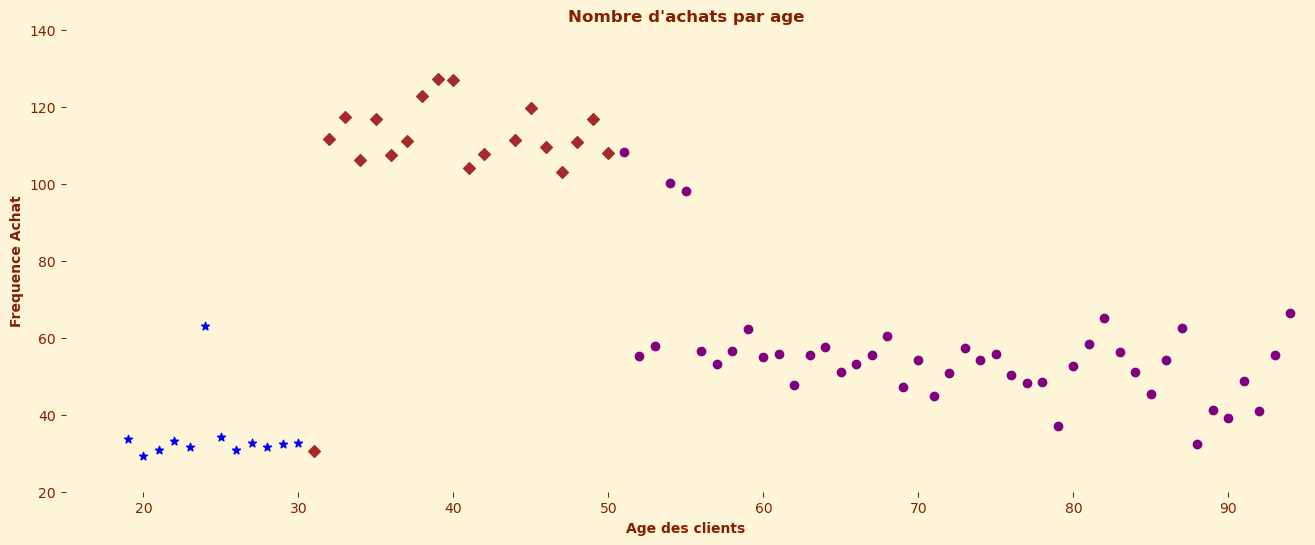

In [106]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Graphique en nuage de point plot.figure()
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
plot.scatter(x = clients1830['age'], y = clients1830['frequence_achat'], color = 'blue', marker = '*')
plot.scatter(x = clients3150['age'], y = clients3150['frequence_achat'], color = 'brown', marker = 'D')
plot.scatter(x = clients51etplus['age'], y = clients51etplus['frequence_achat'], color = 'purple', marker = 'o')
plot.ylim(20, 140) # Echelle de Y
plot.xlim(15, 95) # Echelle de X
plot.title("Nombre d'achats par age", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Age des clients', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel("Frequence Achat", color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.show() # Afficher le Graphique

In [107]:
#Test de corrélation Pearson - avec les variables  « âge » et « frequences d'achats »
pearson_coeff, pvalue = scipystats.pearsonr(correlation03['age'], correlation03['frequence_achat'])
print('pearson_coeff={:.3f},pvalue={:.20f}'.format(pearson_coeff, pvalue))


pearson_coeff=-0.231,pvalue=0.04451547529889775257


> ## Lien entre l'age des clients et la taille du panier moyen
La taille du panier moyen est le nombre d'articles moyen par panier

In [108]:
# Récuperer le dataframe données
correlation04 = donnees.copy()
# Grouper par age et par session
correlation04 = correlation04.groupby(['age', 'session_id']).agg(nb_produits=('id_prod', 'count')).reset_index()
# Grouper selon l'agé du client et la moyenne des produits achetés
correlation04 = correlation04[['age', 'nb_produits']]
#Calcul la moyenne par âge
correlation04 = correlation04.groupby('age').mean().reset_index()
# Grouper selon l'agé du client et la moyenne des produits achetés
correlation04

,age,nb_produits
0,19,1.770651
1,20,1.706119
2,21,1.766917
3,22,1.754956
4,23,1.822307
...,...,...
71,90,1.408072
72,91,1.494898
73,92,1.802198
74,93,1.552448


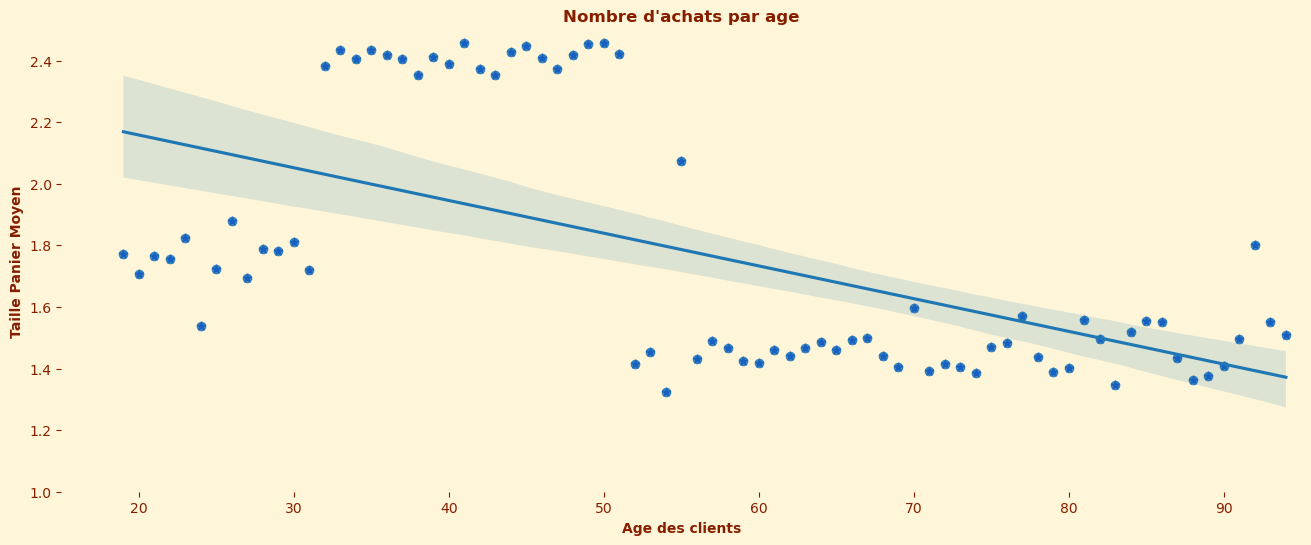

In [109]:
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9') # Graphique en nuage de point plot.figure()
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
plot.scatter(x = correlation04['age'], y = correlation04['nb_produits'], color = 'blue', marker = '*')
sns.regplot(x='age', y='nb_produits', data =correlation04)
plot.ylim(1, 2.5) # Echelle de Y
plot.xlim(15, 95) # Echelle de X
plot.title("Nombre d'achats par age", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Age des clients', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel("Taille Panier Moyen", color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.show() # Afficher le graphique

In [110]:
# Identifier les différents groupe de clients
clients1830 = correlation04[correlation04['age'] < 31]
clients3150 = correlation04[(correlation04['age'] >= 31) & (correlation04['age'] < 51)] 
clients51etplus = correlation04[correlation04['age'] >= 51]

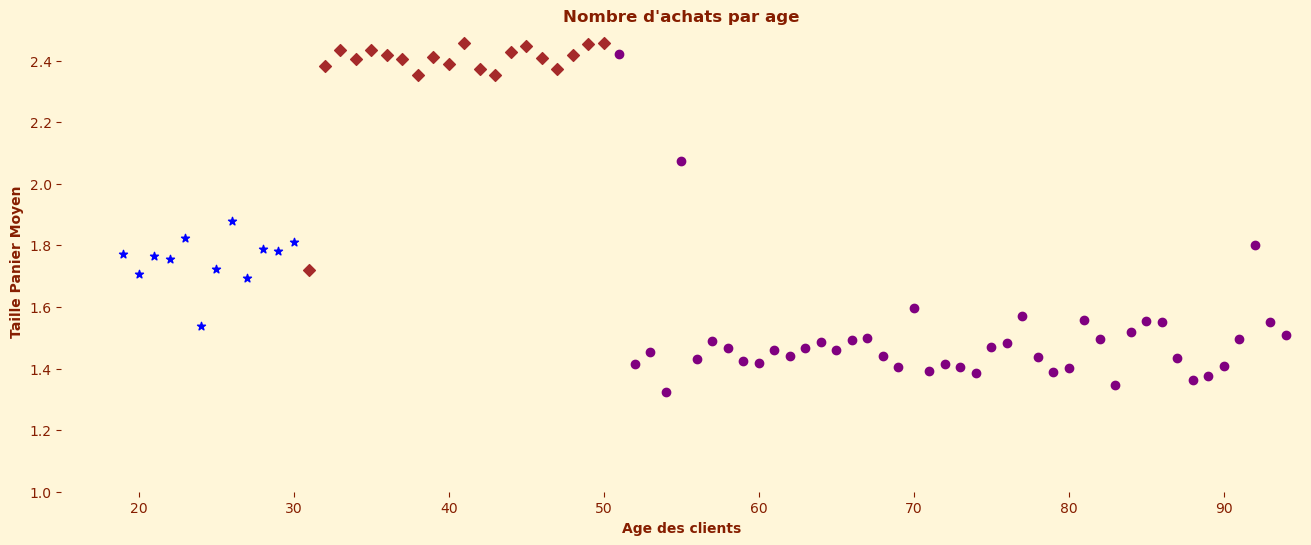

In [111]:
# Graphique en nuage de point plot.figure()
plot.figure(figsize = (16, 6)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
plot.scatter(x = clients1830['age'], y = clients1830['nb_produits'], color = 'blue', marker = '*')
plot.scatter(x = clients3150['age'], y = clients3150['nb_produits'], color = 'brown', marker = 'D')
plot.scatter(x = clients51etplus['age'], y = clients51etplus['nb_produits'], color = 'purple', marker = 'o')
plot.ylim(1, 2.5) # Echelle de Y
plot.xlim(15, 95) # Echelle de X
plot.title("Nombre d'achats par age", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Age des clients', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel("Taille Panier Moyen", color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.show();

In [112]:
#Test de corrélation Pearson - avec les variables  « âge » et « Montant total des achats »
pearson_coeff, pvalue = scipystats.pearsonr(correlation04['age'], correlation04['nb_produits'])
print('pearson_coeff={:.3f},pvalue={:.20f}'.format(pearson_coeff, pvalue))


pearson_coeff=-0.572,pvalue=0.00000006791379036296


> ## Lien entre l'age des clients et les catégories de livres achetés

In [113]:
correlation10 = donnees.copy()
# déterminer l'age Maximum et l'age Minimum
ageMini = correlation10['age'].min()
ageMaxi = correlation10['age'].max()
# Discrétiser la classe d'âge par la formule de Sturges_Huntsberger
nbClasse = numpy.round(1 + 3.322 * numpy.log10(ageMaxi - ageMini + 1),0)
print('Le nombre de classe doit être de', nbClasse)
# Calculer l'intervalle
intervalle = numpy.round((ageMaxi - ageMini) / nbClasse,0)
intervalle = int(intervalle)
print('Les intervalles sont situés tous les', intervalle, 'ans')

Le nombre de classe doit être de 7.0
Les intervalles sont situés tous les 11 ans


In [114]:
# Lister les intervalles
ageMini = correlation10['age'].min()
listeIntervalle = []
while ageMini + intervalle  < ageMaxi :
    ageMini = ageMini + intervalle 
    if ageMini < ageMaxi :
        listeIntervalle.append(ageMini)
# Afficher les intervalles
listeIntervalle

[30, 41, 52, 63, 74, 85]

In [115]:
# Ajouter les classes d'âges
correlation10['classe_age'] = correlation10['age'].transform(
    ajout_classe_age, axis=0)
# Sauvarde données avec classed'age
donnes_classe_age = correlation10.copy()
# Afficher les données
correlation10.head(8)

,id_prod,date,session_id,client_id,sex,birth,price,categ,age,annee_mois,classe_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0,37,2022-05,29-39
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0,35,2022-02,29-39
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0,55,2022-06,51-61
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0,23,2021-06,18-28
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0,43,2023-01,40-50
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,f,1972,8.57,0.0,51,2022-10,51-61
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782,m,1981,11.99,0.0,42,2022-06,40-50
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456,f,1985,7.04,0.0,38,2021-06,29-39


In [116]:
# Supprimer les colonnes inutiles
correlation10.drop(columns=['id_prod', 'date', 'session_id',
                   'client_id', 'sex', 'birth', 'annee_mois', 'age'], inplace=True)
correlation10

,price,categ,classe_age
0,4.18,0.0,29-39
1,15.99,1.0,29-39
2,7.99,0.0,51-61
3,69.99,2.0,18-28
4,4.99,0.0,40-50
...,...,...,...
679106,12.99,0.0,62-72
679107,10.99,1.0,40-50
679108,12.99,0.0,29-39
679109,4.98,0.0,29-39


In [117]:
# Grouper par classe d'age en comptant le nombre de prix et la somme des prix en ré-initilaisant l'index
correlation10 = correlation10.groupby(['classe_age', 'categ'])[
    'price'].agg(['count', 'sum']).reset_index()
# Renommer les colonnes
correlation10.rename(columns={'count': 'nb_ventes', 'sum': 'ca'}, inplace=True)
# Afficher les données
correlation10

,classe_age,categ,nb_ventes,ca
0,18-28,0.0,12759,135705.45
1,18-28,1.0,23820,489404.04
2,18-28,2.0,26073,1977397.17
3,29-39,0.0,115513,1230573.31
4,29-39,1.0,41617,851763.62
5,29-39,2.0,6611,495691.56
6,40-50,0.0,181196,1923834.18
7,40-50,1.0,57905,1184200.62
8,40-50,2.0,818,74855.78
9,51-61,0.0,52193,555875.25


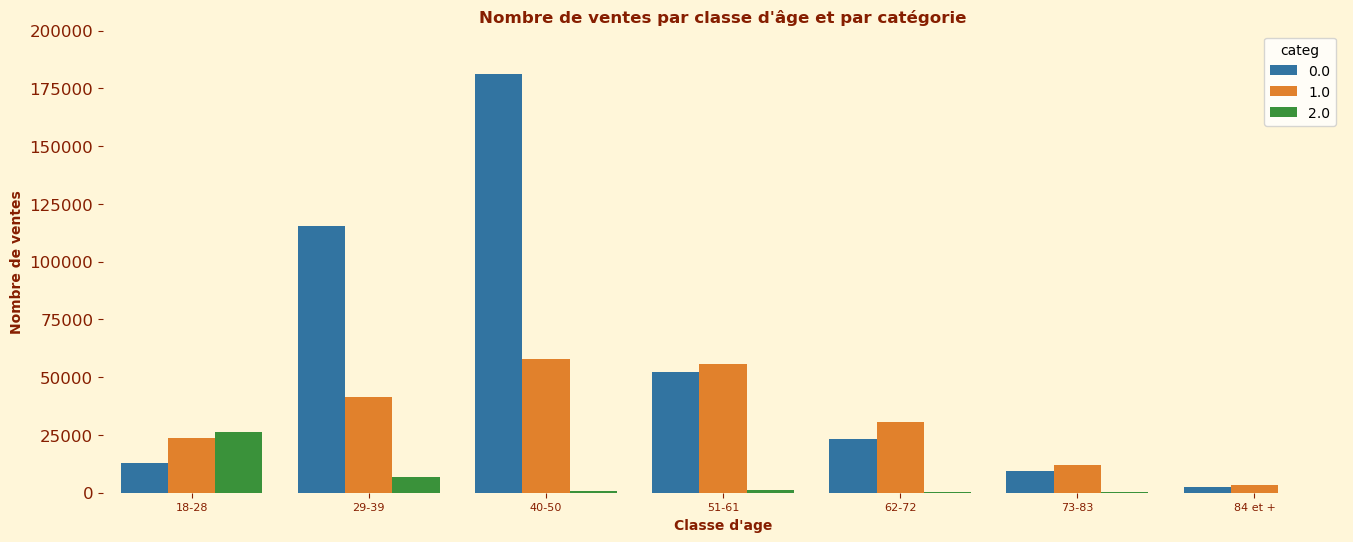

In [118]:
plot.figure(figsize=(16, 6)).patch.set_facecolor('#fff6d9') # Création du praphique avec Taille et couleur de fond
plot.gca().set_facecolor('#fff6d9')  # Couleur de fond
plot.gca().tick_params(colors='#861e00')  # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False)  # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.barplot(x='classe_age', y='nb_ventes', data=correlation10, hue='categ', dodge=True, palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plot.ylim(0, 200000)  # Echelle de Y
plot.title("Nombre de ventes par classe d'âge et par catégorie", color='#861e00', fontweight='bold')  # titre du graphique
plot.xlabel("Classe d'age", color='#861e00', fontweight='bold')  # Titre axe des X
plot.ylabel('Nombre de ventes', color='#861e00', fontweight='bold')  # Titre axe des Y
plot.xticks(fontsize=8) # Tailel Police axe X
plot.yticks(fontsize=12) # Taille police axe Y
plot.legend # Legende
plot.show() # Afficher le graphique

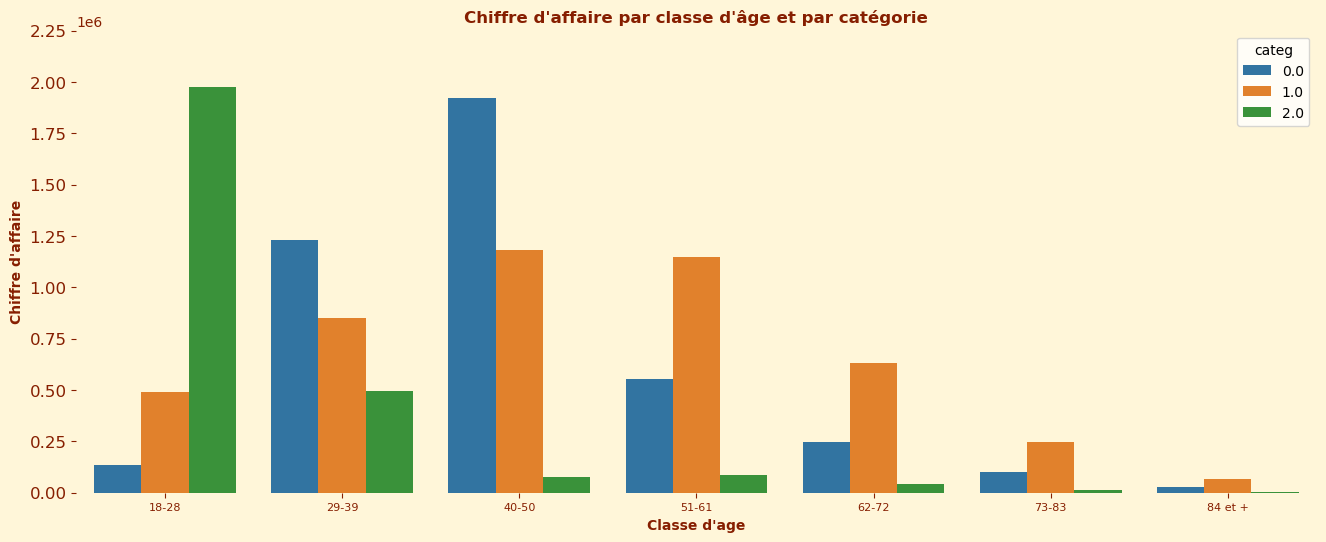

In [119]:
plot.figure(figsize=(16, 6)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9')  # Couleur de fond
plot.gca().tick_params(colors='#861e00')  # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False)  # Masquage du cadre noir
# Selectionner les données par axe, option couleur et marqueur
sns.barplot(x='classe_age', y='ca', data=correlation10,hue='categ', dodge=True,palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plot.ylim(0, 2250000)  # Echelle de Y
plot.title("Chiffre d'affaire par classe d'âge et par catégorie",color='#861e00', fontweight='bold')  # titre du graphique
plot.xlabel("Classe d'age", color='#861e00', fontweight='bold')  # Titre axe des X
plot.ylabel("Chiffre d'affaire", color='#861e00', fontweight='bold')  # Titre axe des Y
plot.xticks(fontsize=8)
plot.yticks(fontsize=12)
plot.legend
plot.show()

In [120]:
#Recupération des valeurs numériques
Correlation11 = colonnes_numeriques

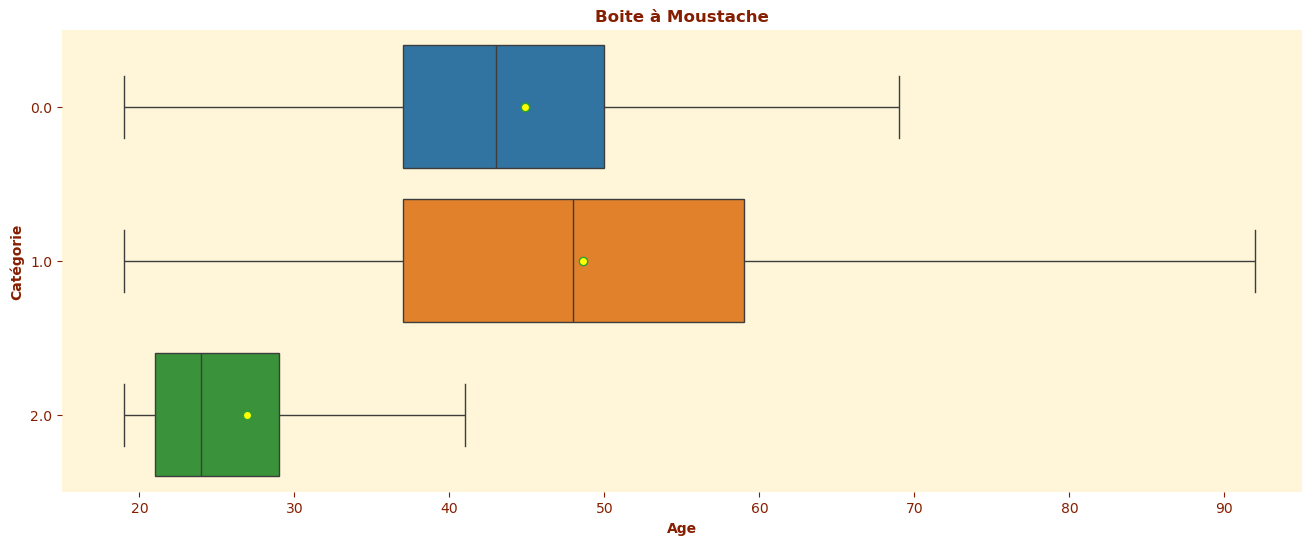

In [121]:
# Boite à moustache
plot.figure(figsize=(16, 6))
plot.gca().set_facecolor('#fff6d9')  # Couleur de fond
plot.gca().tick_params(colors='#861e00')  # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False)  # Masquage du cadre noir
sns.boxplot(x="age", y='categ', data=colonnes_numeriques, orient="h", fliersize=0,
            showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'yellow'},palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plot.xlim(15, 95)  # Echelle de X
plot.title("Boite à Moustache", color='#861e00',
           fontweight='bold')  # titre du graphique
plot.xlabel('Age', color='#861e00', fontweight='bold')  # Titre axe des X
plot.ylabel('Catégorie', color='#861e00', fontweight='bold')  # Titre axe des X
plot.show()

# - CONCLUSION